<a href="https://colab.research.google.com/github/lsh950919/Portfolio/blob/main/Post_COVID_19_Project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')
!pip install ipython.autotime
%load_ext autotime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Processing /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e/ipython_autotime-0.1-cp36-none-any.whl


In [ ]:
# 나눔고딕 설치
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 
fm._rebuild()

plt.rc('axes', unicode_minus = False)



time: 2.4 s


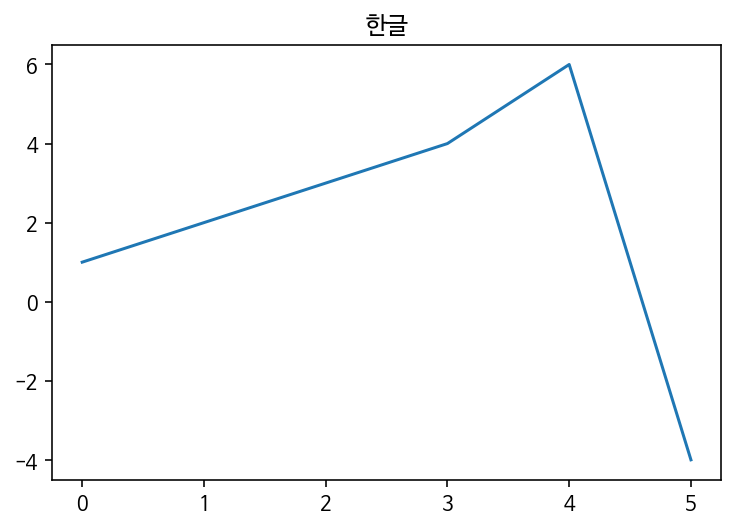

time: 243 ms


In [ ]:
pd.Series([1, 2,3, 4, 6, -4]).plot(title="한글")

# 데이터 불러오기 & 전처리

In [ ]:
df = pd.read_csv('인구카드코로나.csv')

time: 1.25 s


In [ ]:
df.shape

(357847, 8)

time: 4.65 ms


In [ ]:
# 전처리
df = df[(df['업계'] != '기타') & (~df['업종명'].isin(['카지노', 'P2P송금', '콘도']))]
df['날짜'] = pd.to_datetime(df['날짜'])
df['요일'] = df.날짜.dt.dayofweek
dates = [pd.date_range('20200310', '20200313'), pd.date_range('20200507', '20200520'), 
         pd.date_range('20200525', '20200529'), pd.date_range('20200604', '20200614')]
datelist = []
for range in dates:
  for date in range:
    datelist.append(date)
df['이슈'] = df['날짜'].map(lambda x: 1 if x in datelist else 0)

time: 2.25 s


In [ ]:
df_dateindex = df.set_index('날짜')
df_dateindex

업종명  시군구  판매건수        매출액     유동인구     업계  확진자수  요일  이슈
날짜                                                                      
2020-01-04      특급호텔  강남구   549  146315331  4268654     숙박     0   5   0
2020-01-04      특급호텔   중구   928  239811377  1669677     숙박     0   5   0
2020-01-04      1급호텔   중구    38    6941145  1669677     숙박     0   5   0
2020-01-04     기타숙박업  강남구   444   57200876  4268654     숙박     0   5   0
2020-01-04     기타숙박업  강동구   180    7928000  2425402     숙박     0   5   0
...              ...  ...   ...        ...      ...    ...   ...  ..  ..
2020-06-14  오프라인의류매장  용산구   548   59431500  1848525  패션&뷰티     1   6   1
2020-06-14  오프라인의류매장  은평구   684   36445600  1436435  패션&뷰티     1   6   1
2020-06-14  오프라인의류매장  종로구  1184   79018656  1269669  패션&뷰티     0   6   1
2020-06-14  오프라인의류매장   중구  7300  447805275  1166980  패션&뷰티     0   6   1
2020-06-14  오프라인의류매장  중랑구   551   22474545  1436522  패션&뷰티     0   6   1

[324041 rows x 9 columns]

time: 53.4 ms


# EDA

In [ ]:
df.groupby('업종명').판매건수.sum()

업종명
1급호텔         51300
2급호텔         31913
CATV          6862
CATV홈쇼핑    2016506
LPG         444355
            ...   
홍삼제품         54910
화랑           12770
화방표구점        26656
화원          557351
화장품        1733192
Name: 판매건수, Length: 213, dtype: int64

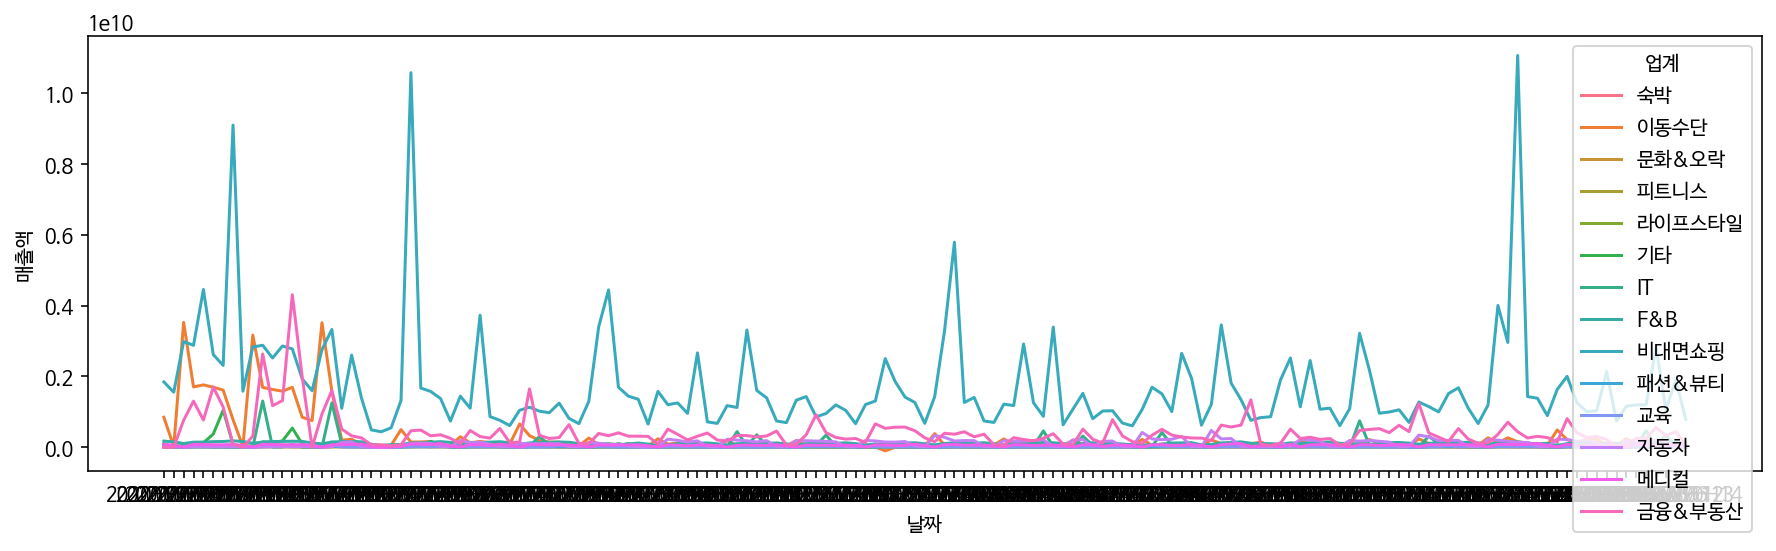

time: 2.64 s


In [ ]:
plt.figure(figsize = (15, 4))
sns.lineplot(data = df, x = '날짜', y = '매출액', hue = '업계', ci = None)

# 지역별 판매건수

In [ ]:
gu = df.groupby(['날짜', '시군구'])['판매건수'].sum().reset_index()
gu

날짜  시군구    판매건수
0    2020-01-04  강남구  342116
1    2020-01-04  강동구   76819
2    2020-01-04  강북구   24889
3    2020-01-04  강서구  149698
4    2020-01-04  관악구  104928
...         ...  ...     ...
3870 2020-06-14  용산구  184358
3871 2020-06-14  은평구   80431
3872 2020-06-14  종로구   80785
3873 2020-06-14   중구  295303
3874 2020-06-14  중랑구   60800

[3875 rows x 3 columns]

time: 70.7 ms


In [ ]:
gu.groupby('시군구')['판매건수'].max().sort_values(ascending = False)

시군구
중구      1663608
용산구     1187787
종로구      819058
서초구      668448
강남구      639281
마포구      625420
구로구      397296
동작구      341590
영등포구     292244
송파구      232579
강서구      206436
동대문구     184683
양천구      153364
관악구      151872
강동구      142560
광진구      121108
노원구      117731
서대문구     112640
은평구      106581
금천구      103505
성북구      100595
성동구       99176
중랑구       85815
도봉구       63945
강북구       44700
Name: 판매건수, dtype: int64

time: 14.1 ms


In [ ]:
gu1 = ['강남구', '강동구', '강서구', '구로구', '금천구', '관악구', '광진구', '강북구']
gu2 = ['노원구', '도봉구', '동대문구', '동작구', '마포구', '성북구', '서대문구', '성동구']
gu3 = ['서초구', '송파구', '은평구', '양천구', '영등포구', '용산구', '종로구', '중구', '중랑구']
gu_df1 = gu[gu['시군구'].isin(gu1)]
gu_df2 = gu[gu['시군구'].isin(gu2)]
gu_df3 = gu[gu['시군구'].isin(gu3)]
gus = [gu_df1, gu_df2, gu_df3]

time: 12 ms


In [ ]:
gu.groupby('시군구')['판매건수'].mean().sort_values(ascending = False)

시군구
중구      591008.948387
마포구     435442.541935
강남구     404763.690323
용산구     385840.425806
구로구     292134.180645
동작구     217224.529032
서초구     186318.683871
송파구     141863.141935
강서구     132348.135484
영등포구    131517.722581
종로구     121595.270968
양천구     110518.632258
관악구      92306.987097
강동구      77901.096774
노원구      71318.761290
광진구      71002.612903
서대문구     67179.851613
동대문구     66424.961290
은평구      61962.632258
성북구      61372.832258
성동구      60080.503226
금천구      58304.387097
중랑구      46432.270968
도봉구      35328.929032
강북구      25752.038710
Name: 판매건수, dtype: float64

time: 12.2 ms


## 지역별 총 판매건수 시계열 그래프


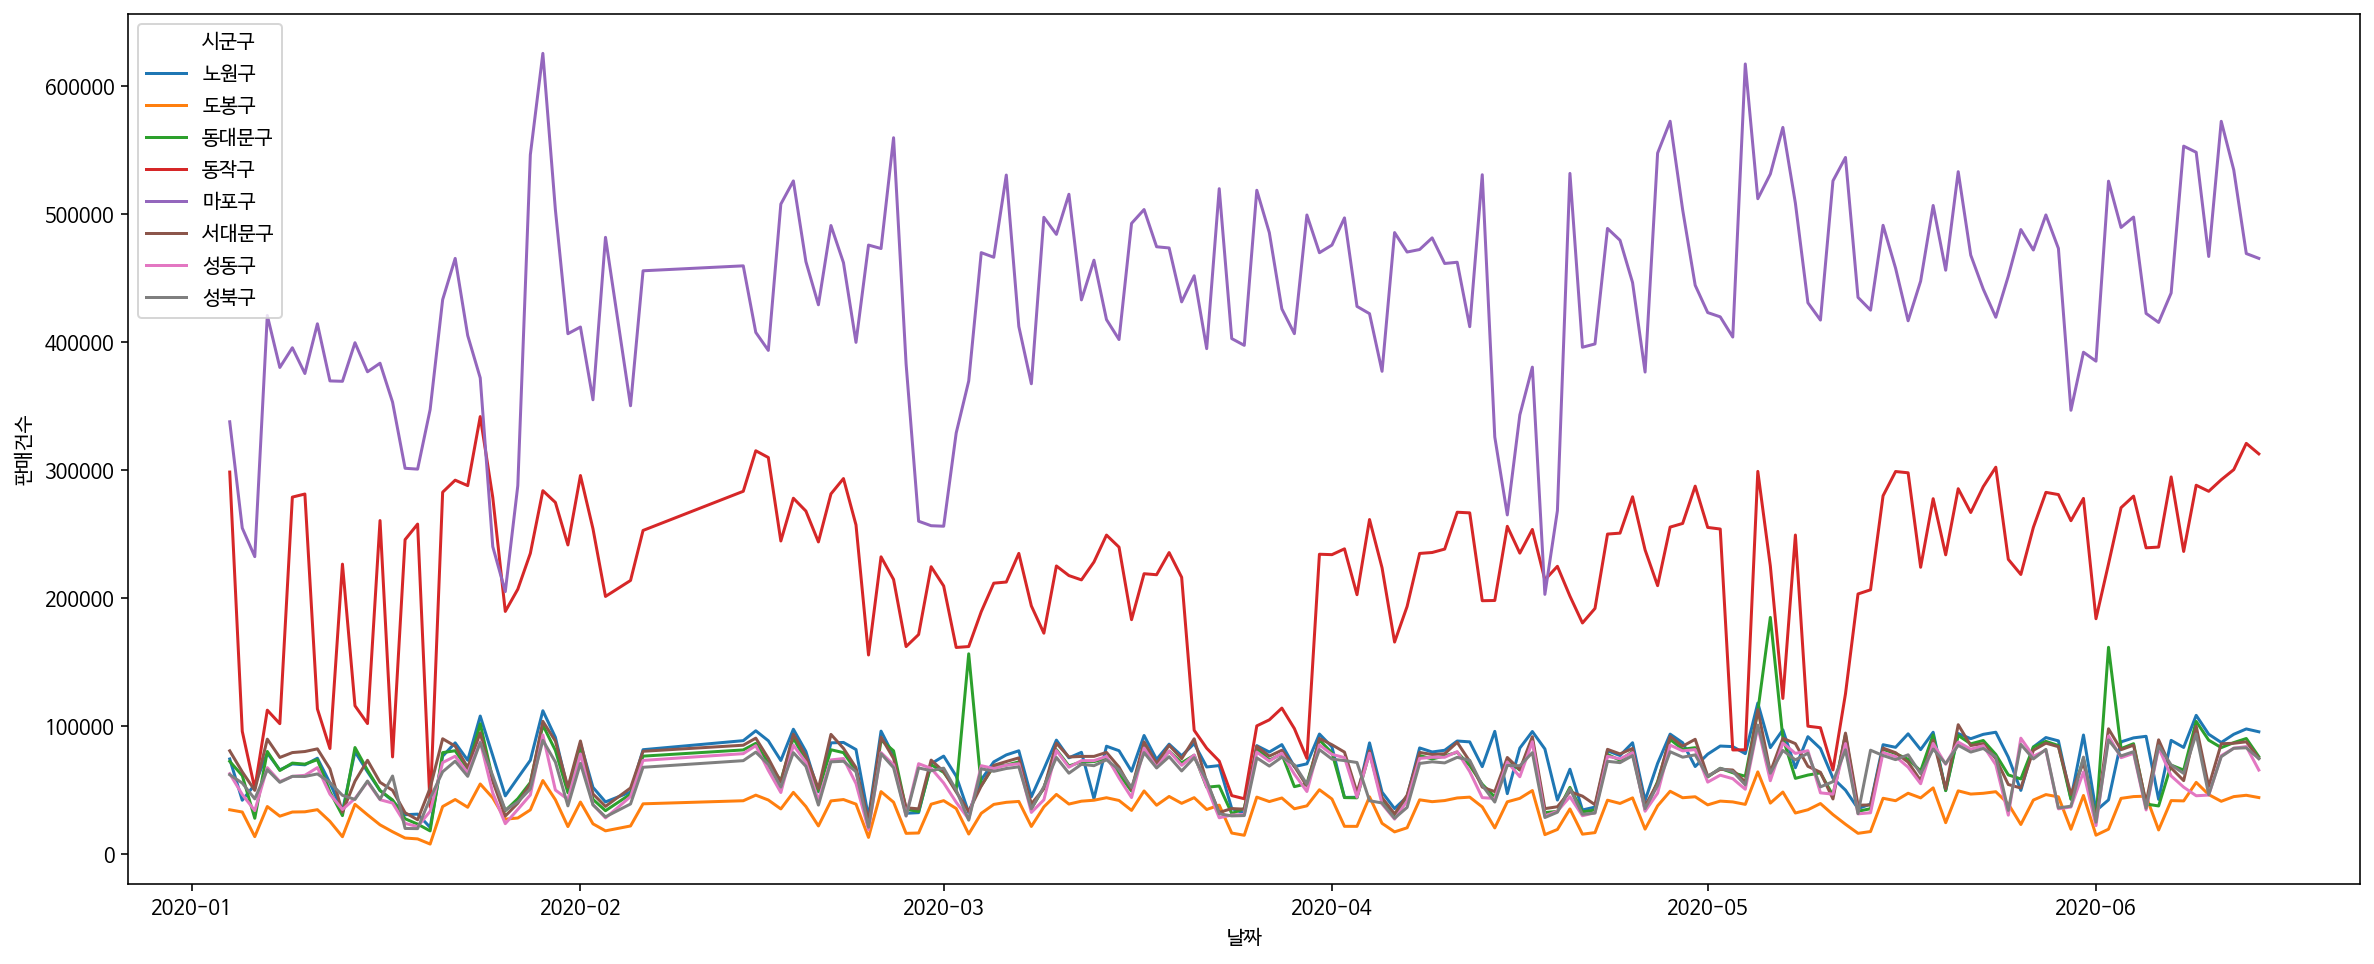

time: 949 ms


In [ ]:
plt.figure(figsize = (20, 8))
sns.lineplot(data = gu_df2, x = '날짜', y = '판매건수', hue = '시군구')


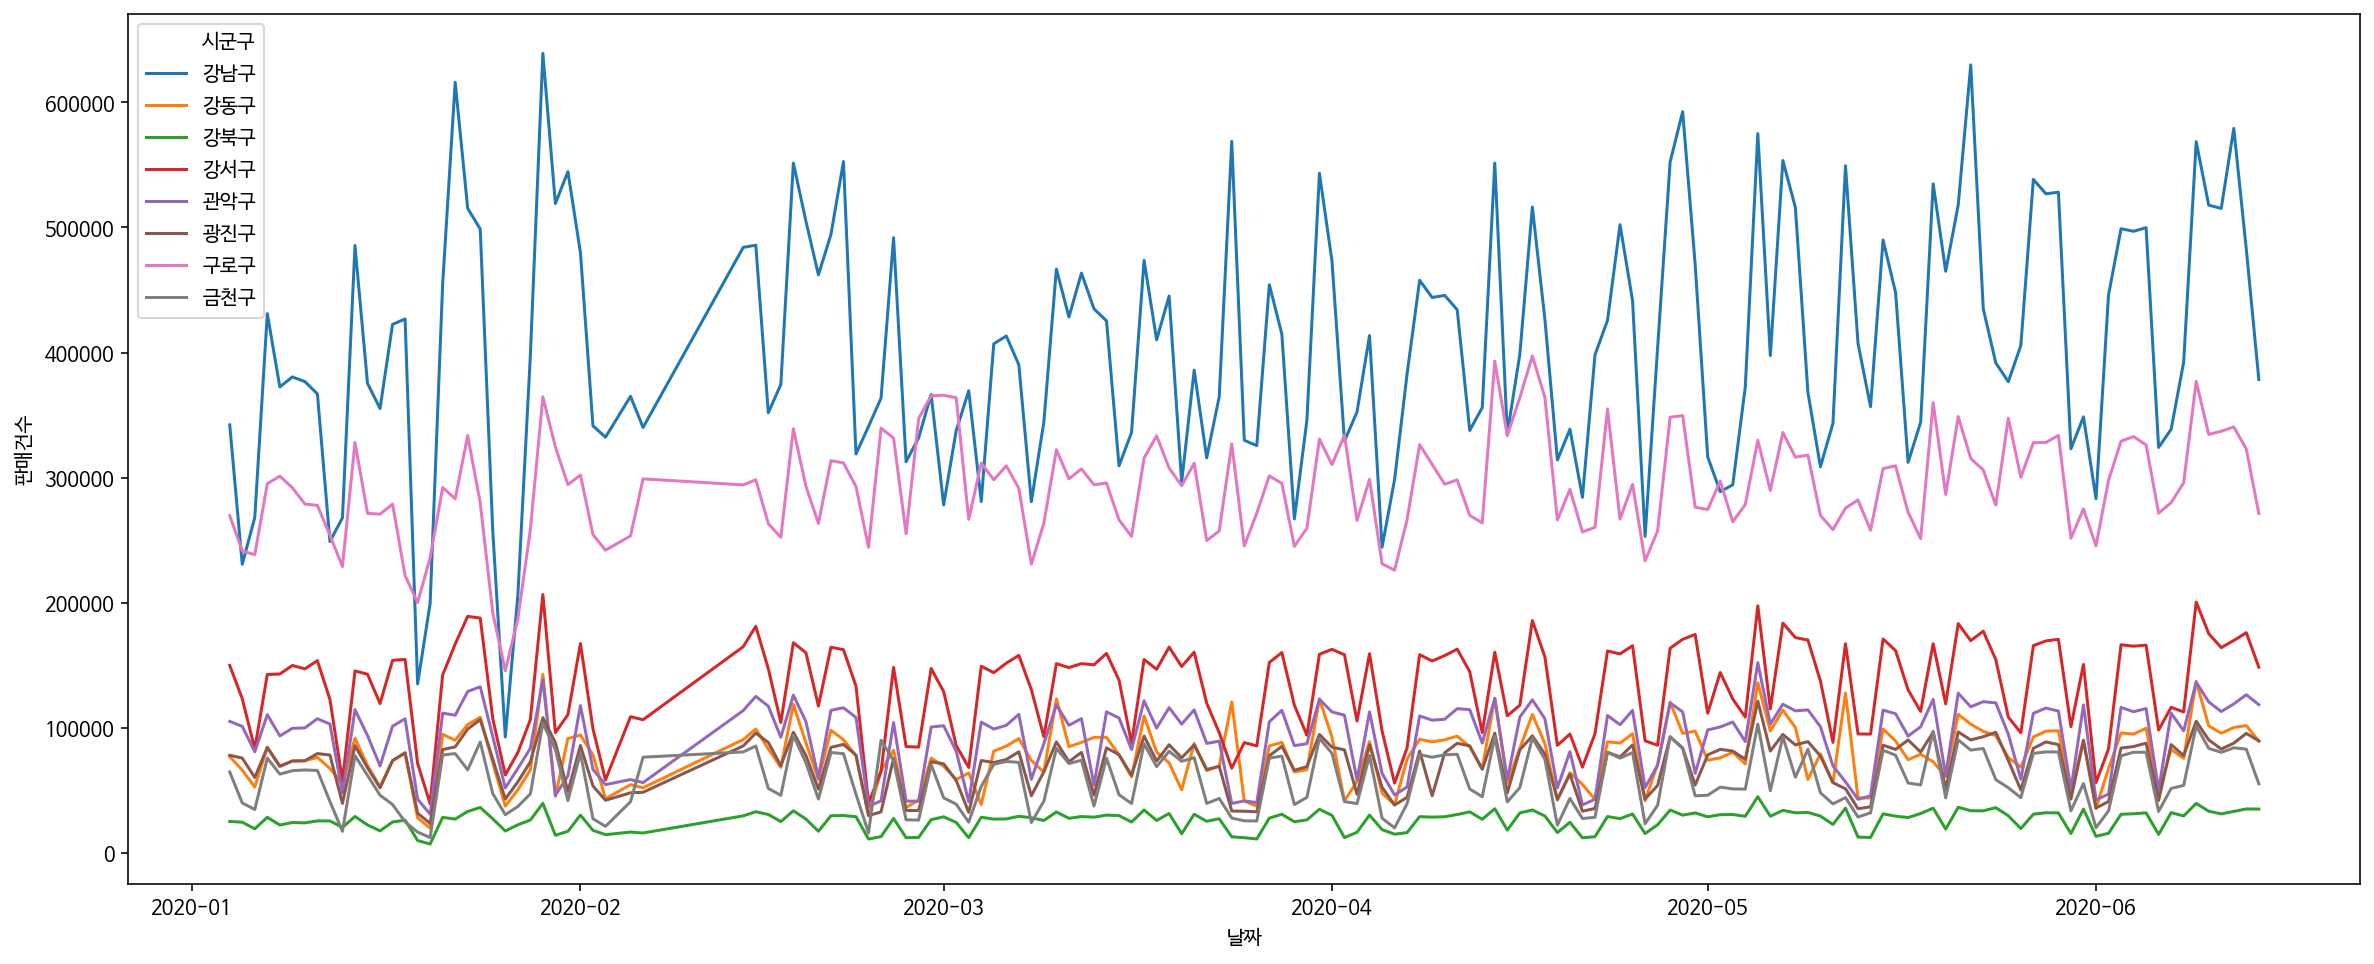

time: 910 ms


In [ ]:
plt.figure(figsize = (20, 8))
sns.lineplot(data = gu_df1, x = '날짜', y = '판매건수', hue = '시군구')


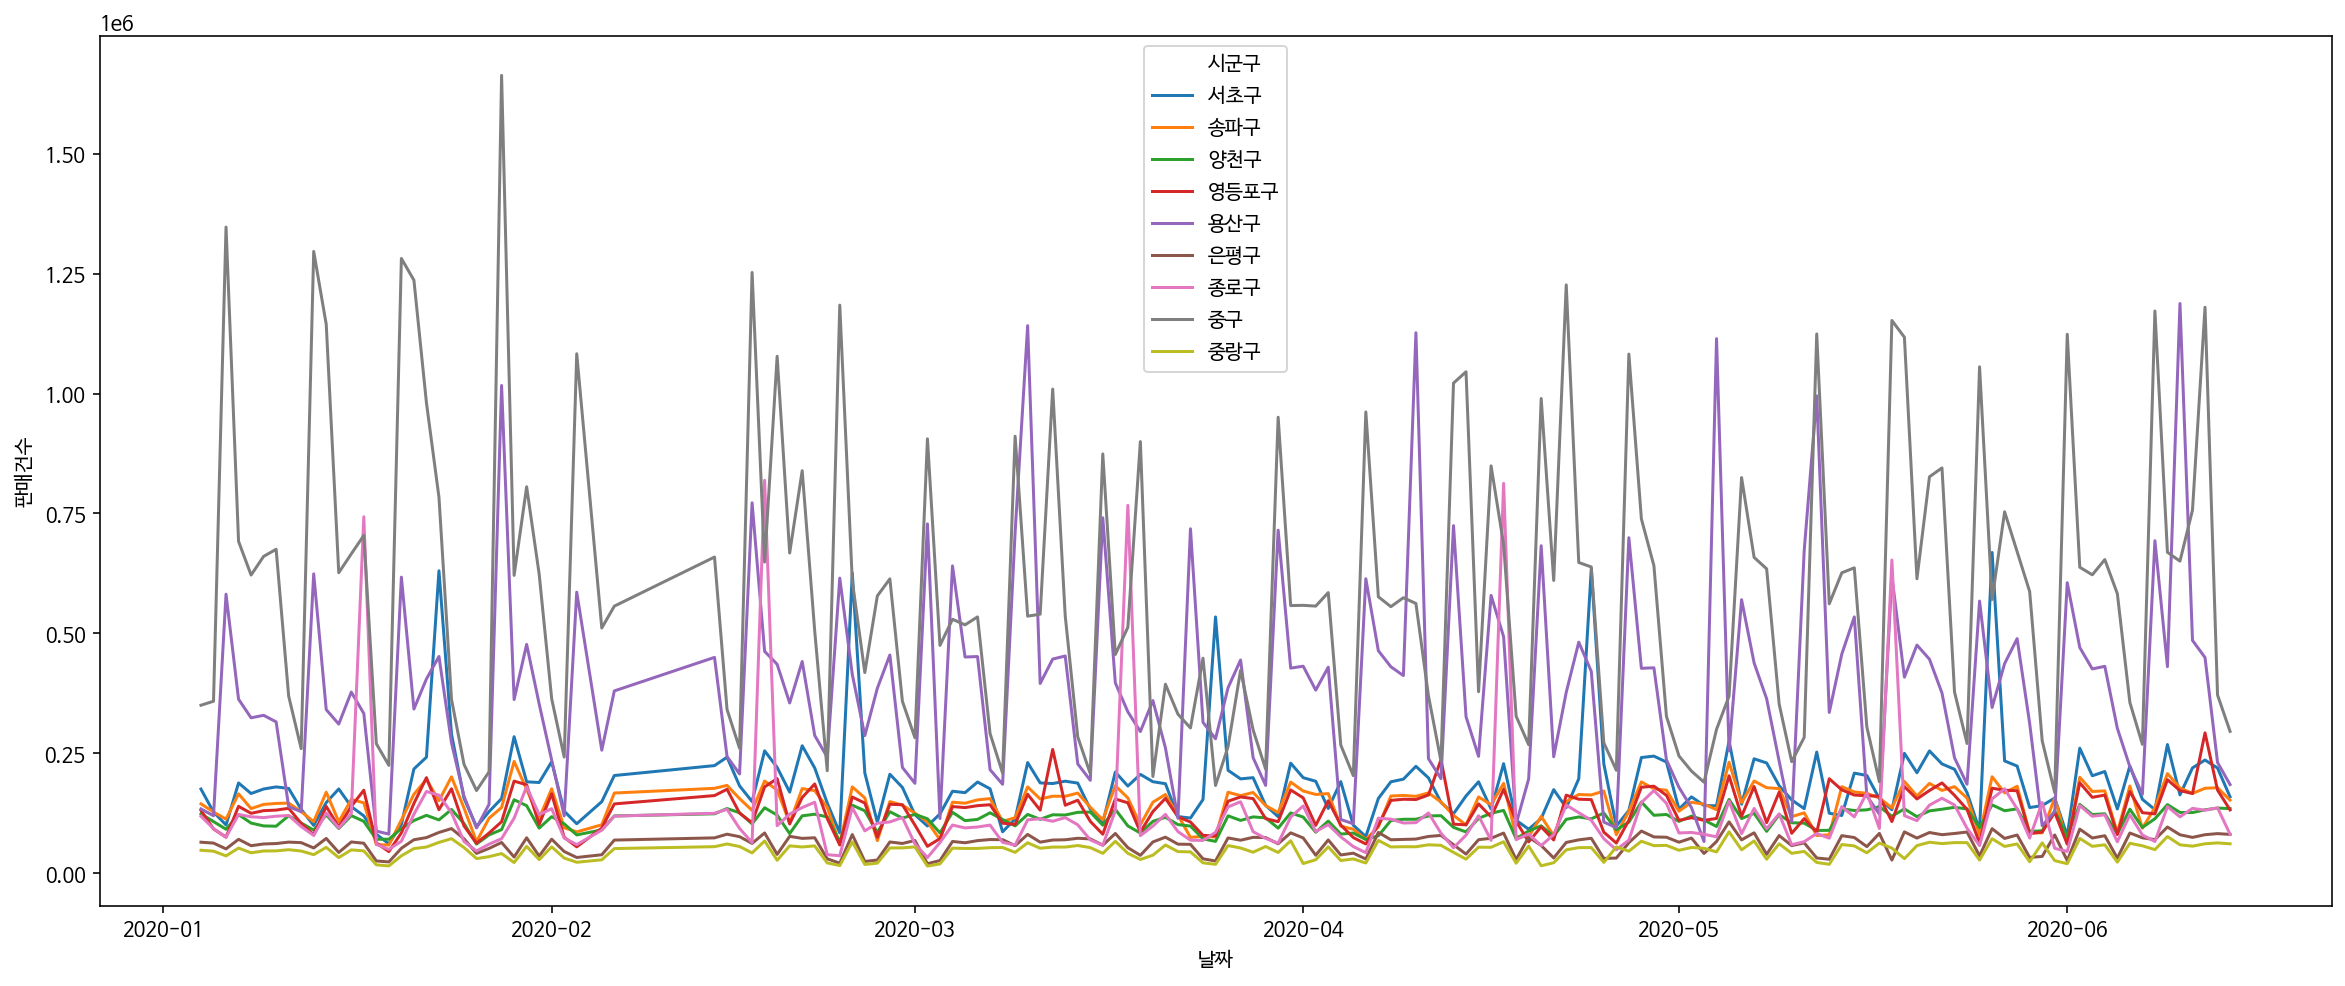

time: 1.08 s


In [ ]:
plt.figure(figsize = (20, 8))
sns.lineplot(data = gu_df3, x = '날짜', y = '판매건수', hue = '시군구')


## 지역별 업종별 판매건수

In [ ]:
df_gu = df.groupby(['시군구', '업종명'])['판매건수'].sum().reset_index()

time: 92.4 ms


In [ ]:
df_gu

시군구    업종명   판매건수
0     강남구   1급호텔  15143
1     강남구   2급호텔   2508
2     강남구    LPG  35766
3     강남구  PG상품권  10609
4     강남구     가구  16907
...   ...    ...    ...
2725  중랑구    한의원  33759
2726  중랑구   헬스크럽   4817
2727  중랑구     화랑     80
2728  중랑구  화방표구점      3
2729  중랑구    화장품  34284

[2730 rows x 3 columns]

time: 26.9 ms


### 지역별 판매건수량 상위 10 업종

In [ ]:
def top10upjong():
  top10 = []
  for gu in df_gu['시군구'].unique():
    top10.append(df_gu[df_gu['시군구'] == gu].sort_values(by = '판매건수', ascending = False).head(10))
  return top10

time: 2.59 ms


In [ ]:
top10 = top10upjong()

time: 41.2 ms


In [ ]:
df_top10 = pd.concat(top10, join = 'outer', ignore_index = True)
df_top10

시군구     업종명      판매건수
0    강남구     연쇄점  10402241
1    강남구  인터넷P/G   8491677
2    강남구     편의점   7381554
3    강남구    서양음식   6543222
4    강남구    일반한식   5670873
..   ...     ...       ...
245  중랑구     제과점    228839
246  중랑구   기타레져업    228175
247  중랑구      의원    205882
248  중랑구     주유소    164988
249  중랑구     정육점    156064

[250 rows x 3 columns]

time: 25 ms


In [ ]:
df_top10['업종명'].unique()

array(['연쇄점', '인터넷P/G', '편의점', '서양음식', '일반한식', '인터넷종합Mall', '손해보험',
       '대형할인점', '약국', '제과점', 'CATV홈쇼핑', '기타레져업', '의원', '자사카드발행백화점',
       '중국음식', '상품권', '항공사', '정육점', '기타음료식품', '주유소', '통신판매', '택시', '주차장',
       '종합병원', '고속버스', '가전제품', '이동통신요금', '생명보험', '일반서적'], dtype=object)

time: 7.09 ms


In [ ]:
from IPython.display import display
for sigungu in df_top10['시군구'].unique():
  display(df_top10[df_top10['시군구'] == sigungu])

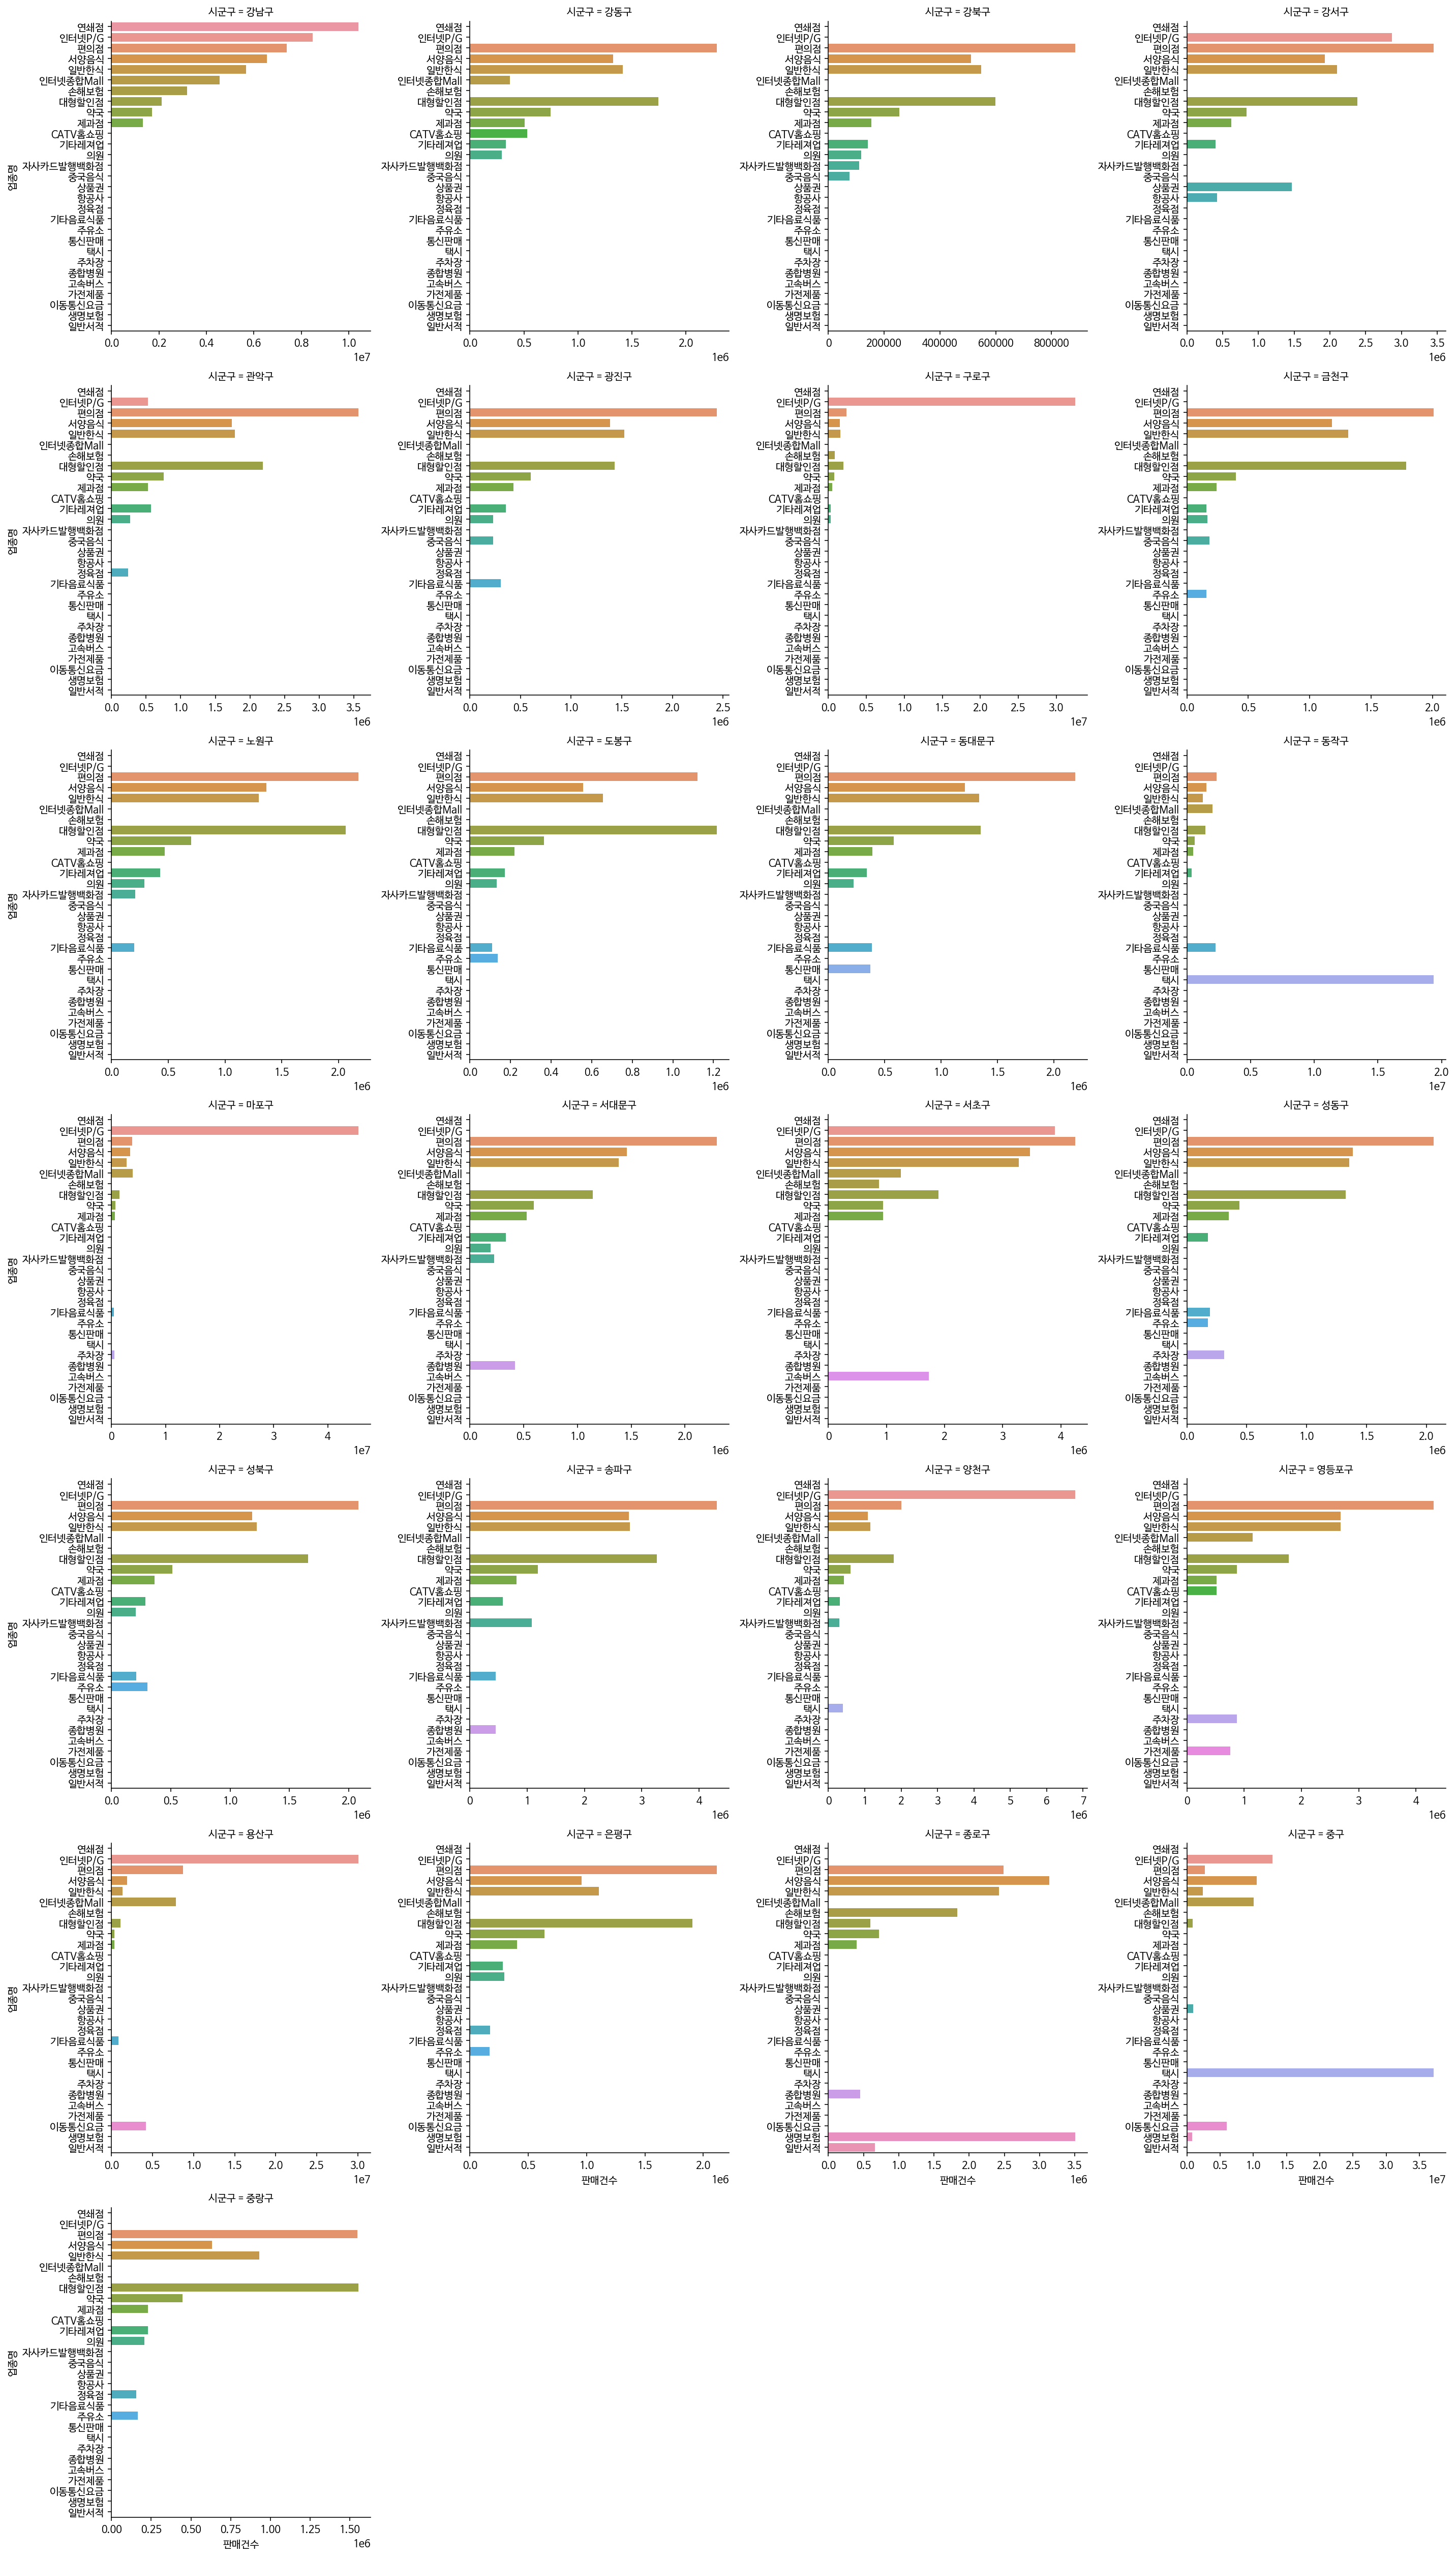

time: 10.8 s


In [ ]:
# 지역별 판매건수 상위10 업종 바그래프
sns.catplot(y = '업종명', x = '판매건수', data = df_top10, col = '시군구', 
            col_wrap = 4, ci = None, kind = 'bar', sharex = False, sharey = False, orient = 'h')

### 지역별 판매건수량 상위 5 업종

In [ ]:
def top5upjong():
  top5 = []
  for gu in df_gu['시군구'].unique():
    top5.append(df_gu[df_gu['시군구'] == gu].sort_values(by = '판매건수', ascending = False).head(5))
  return top5

time: 2.19 ms


In [ ]:
top5 = top5upjong()
df_top5 = pd.concat(top5, join = 'outer', ignore_index = True)
df_top5.head(10)

시군구     업종명      판매건수
0  강남구     연쇄점  10402241
1  강남구  인터넷P/G   8491677
2  강남구     편의점   7381554
3  강남구    서양음식   6543222
4  강남구    일반한식   5670873
5  강동구     편의점   2284223
6  강동구   대형할인점   1743108
7  강동구    일반한식   1416674
8  강동구    서양음식   1324293
9  강동구      약국    744900

time: 91.8 ms


In [ ]:
ind5 = df_top5['업종명'].unique()

array(['연쇄점', '인터넷P/G', '편의점', '서양음식', '일반한식', '대형할인점', '약국', '택시',
       '기타음료식품', '인터넷종합Mall', '이동통신요금', '생명보험', '손해보험'], dtype=object)

time: 8.58 ms


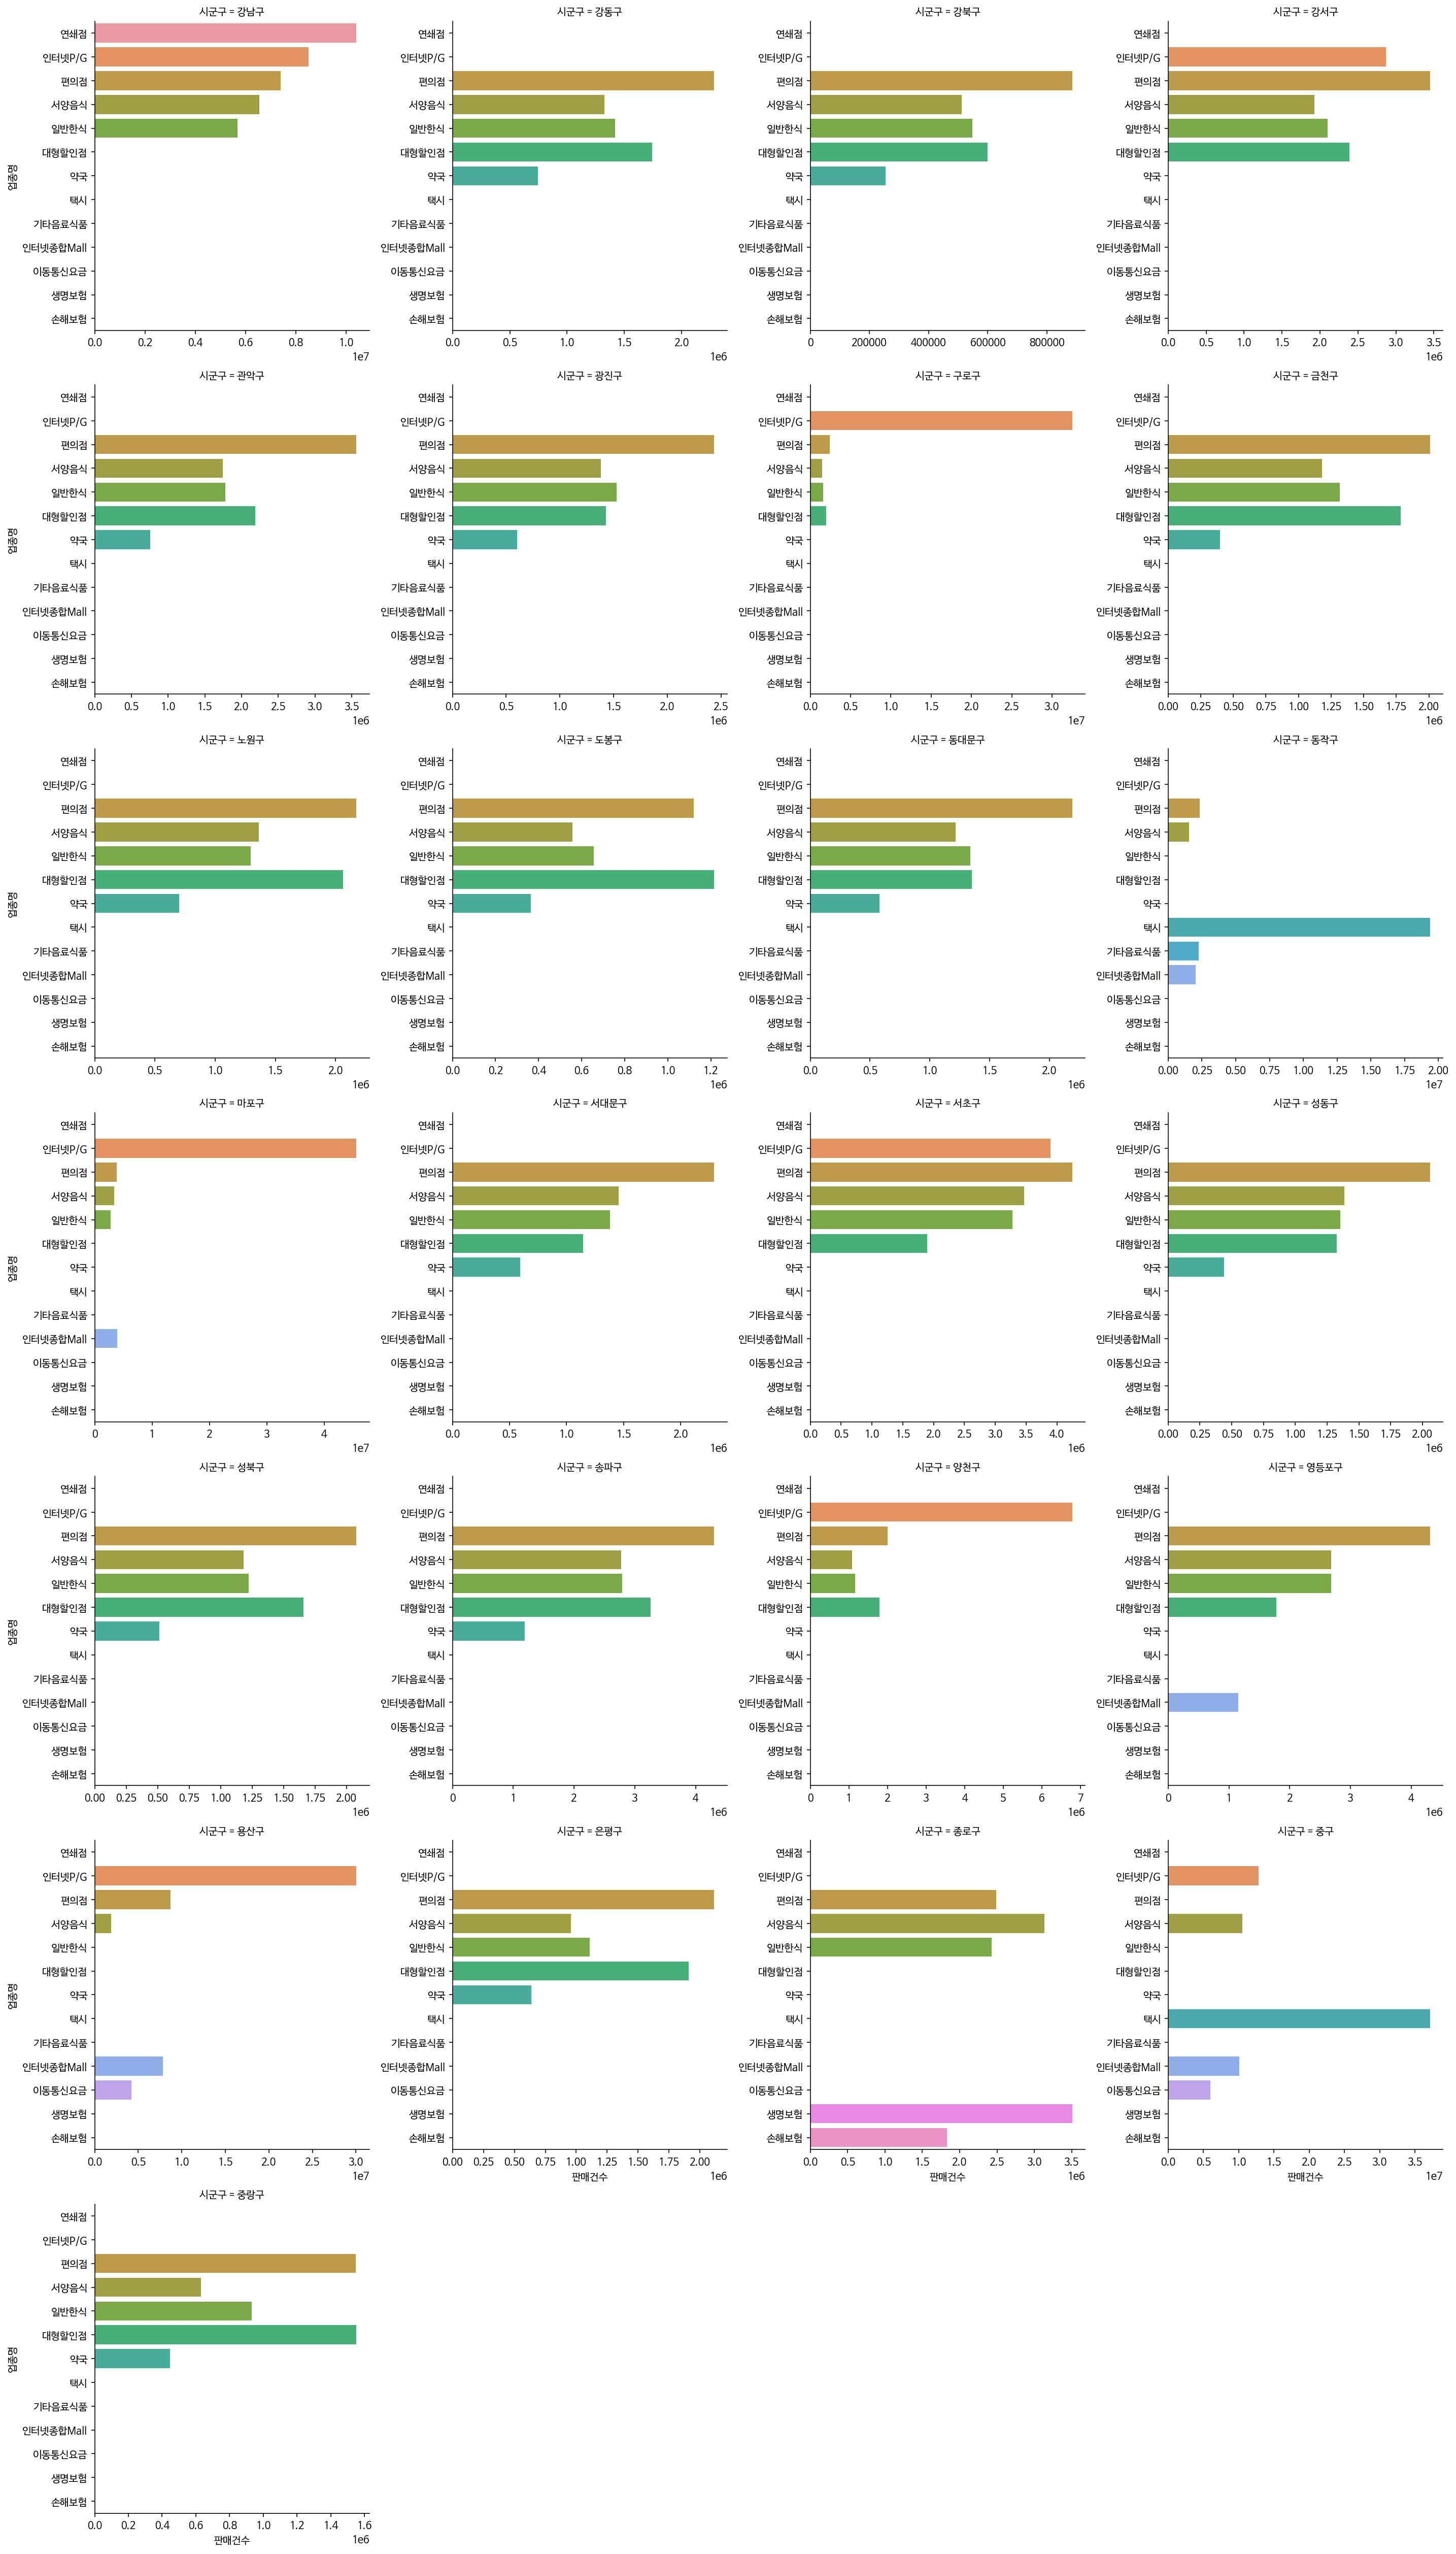

time: 7.76 s


In [ ]:
sns.catplot(y = '업종명', x = '판매건수', data = df_top5, col = '시군구', 
            col_wrap = 4, ci = None, kind = 'bar', sharex = False, sharey = False, orient = 'h')

연쇄점이 강남구를 제외하고 모두 수치가 너무 낮게 나와, 강남구의 수치를 확인해봄

In [ ]:
df[(df['업종명'] == '연쇄점') & (df['판매건수'] > 10000)].head(20)

날짜  업종명  시군구   판매건수        매출액     유동인구      업계  확진자수  요일  이슈
13706 2020-01-22  연쇄점  강남구  66431  625157738  5419596  라이프스타일     0   2   0
15746 2020-01-23  연쇄점  강남구  65404  615076940  4995386  라이프스타일     0   3   0
17797 2020-01-24  연쇄점  강남구  76218  720070900  2843117  라이프스타일     0   4   0
19721 2020-01-25  연쇄점  강남구  69100  717170230  3037545  라이프스타일     0   5   0
22738 2020-01-27  연쇄점  강남구  66482  765020770  2804886  라이프스타일     0   0   0
24338 2020-01-28  연쇄점  강남구  62161  669384220  4717730  라이프스타일     0   1   0
26186 2020-01-29  연쇄점  강남구  77946  752539180  5191067  라이프스타일     0   2   0
28202 2020-01-30  연쇄점  강남구  74516  735870470  5317704  라이프스타일     0   3   0
30244 2020-01-31  연쇄점  강남구  72529  711662490  5370342  라이프스타일     0   4   0
32269 2020-02-01  연쇄점  강남구  72127  715372250  4058418  라이프스타일     0   5   0
34288 2020-02-02  연쇄점  강남구  81153  879784470  3174805  라이프스타일     0   6   0
36207 2020-02-03  연쇄점  강남구  75933  836143310  4966690  라이프스타일     0   0   0
38035 2020-02-05  연쇄점  강남구  65571  621769950  5108921  라이프스타일     0   2   0
40035 2020-02-06  연쇄점  강남구  64230  618076644  5144470  라이프스타일     0   3   0
42057 2020-02-14  연쇄점  강남구  82605  790085110  5876392  라이프스타일     0   4   0
44083 2020-02-15  연쇄점  강남구  78902  734907510  4791207  라이프스타일     0   5   0
46084 2020-02-16  연쇄점  강남구  82804  861975450  3609703  라이프스타일     0   6   0
47964 2020-02-17  연쇄점  강남구  68799  773884710  5128054  라이프스타일     0   0   0
49768 2020-02-18  연쇄점  강남구  61667  585313880  5515731  라이프스타일     0   1   0
51750 2020-02-19  연쇄점  강남구  68540  660940130  5734709  라이프스타일     0   2   0

time: 51.9 ms


연쇄점의 총 판매건수중 강남구가 거의 100%를 차지하고 있기에, 프랜차이즈 본사 위치 기준으로 결제가 됐다고 판단

# 일별 판매건수 차이

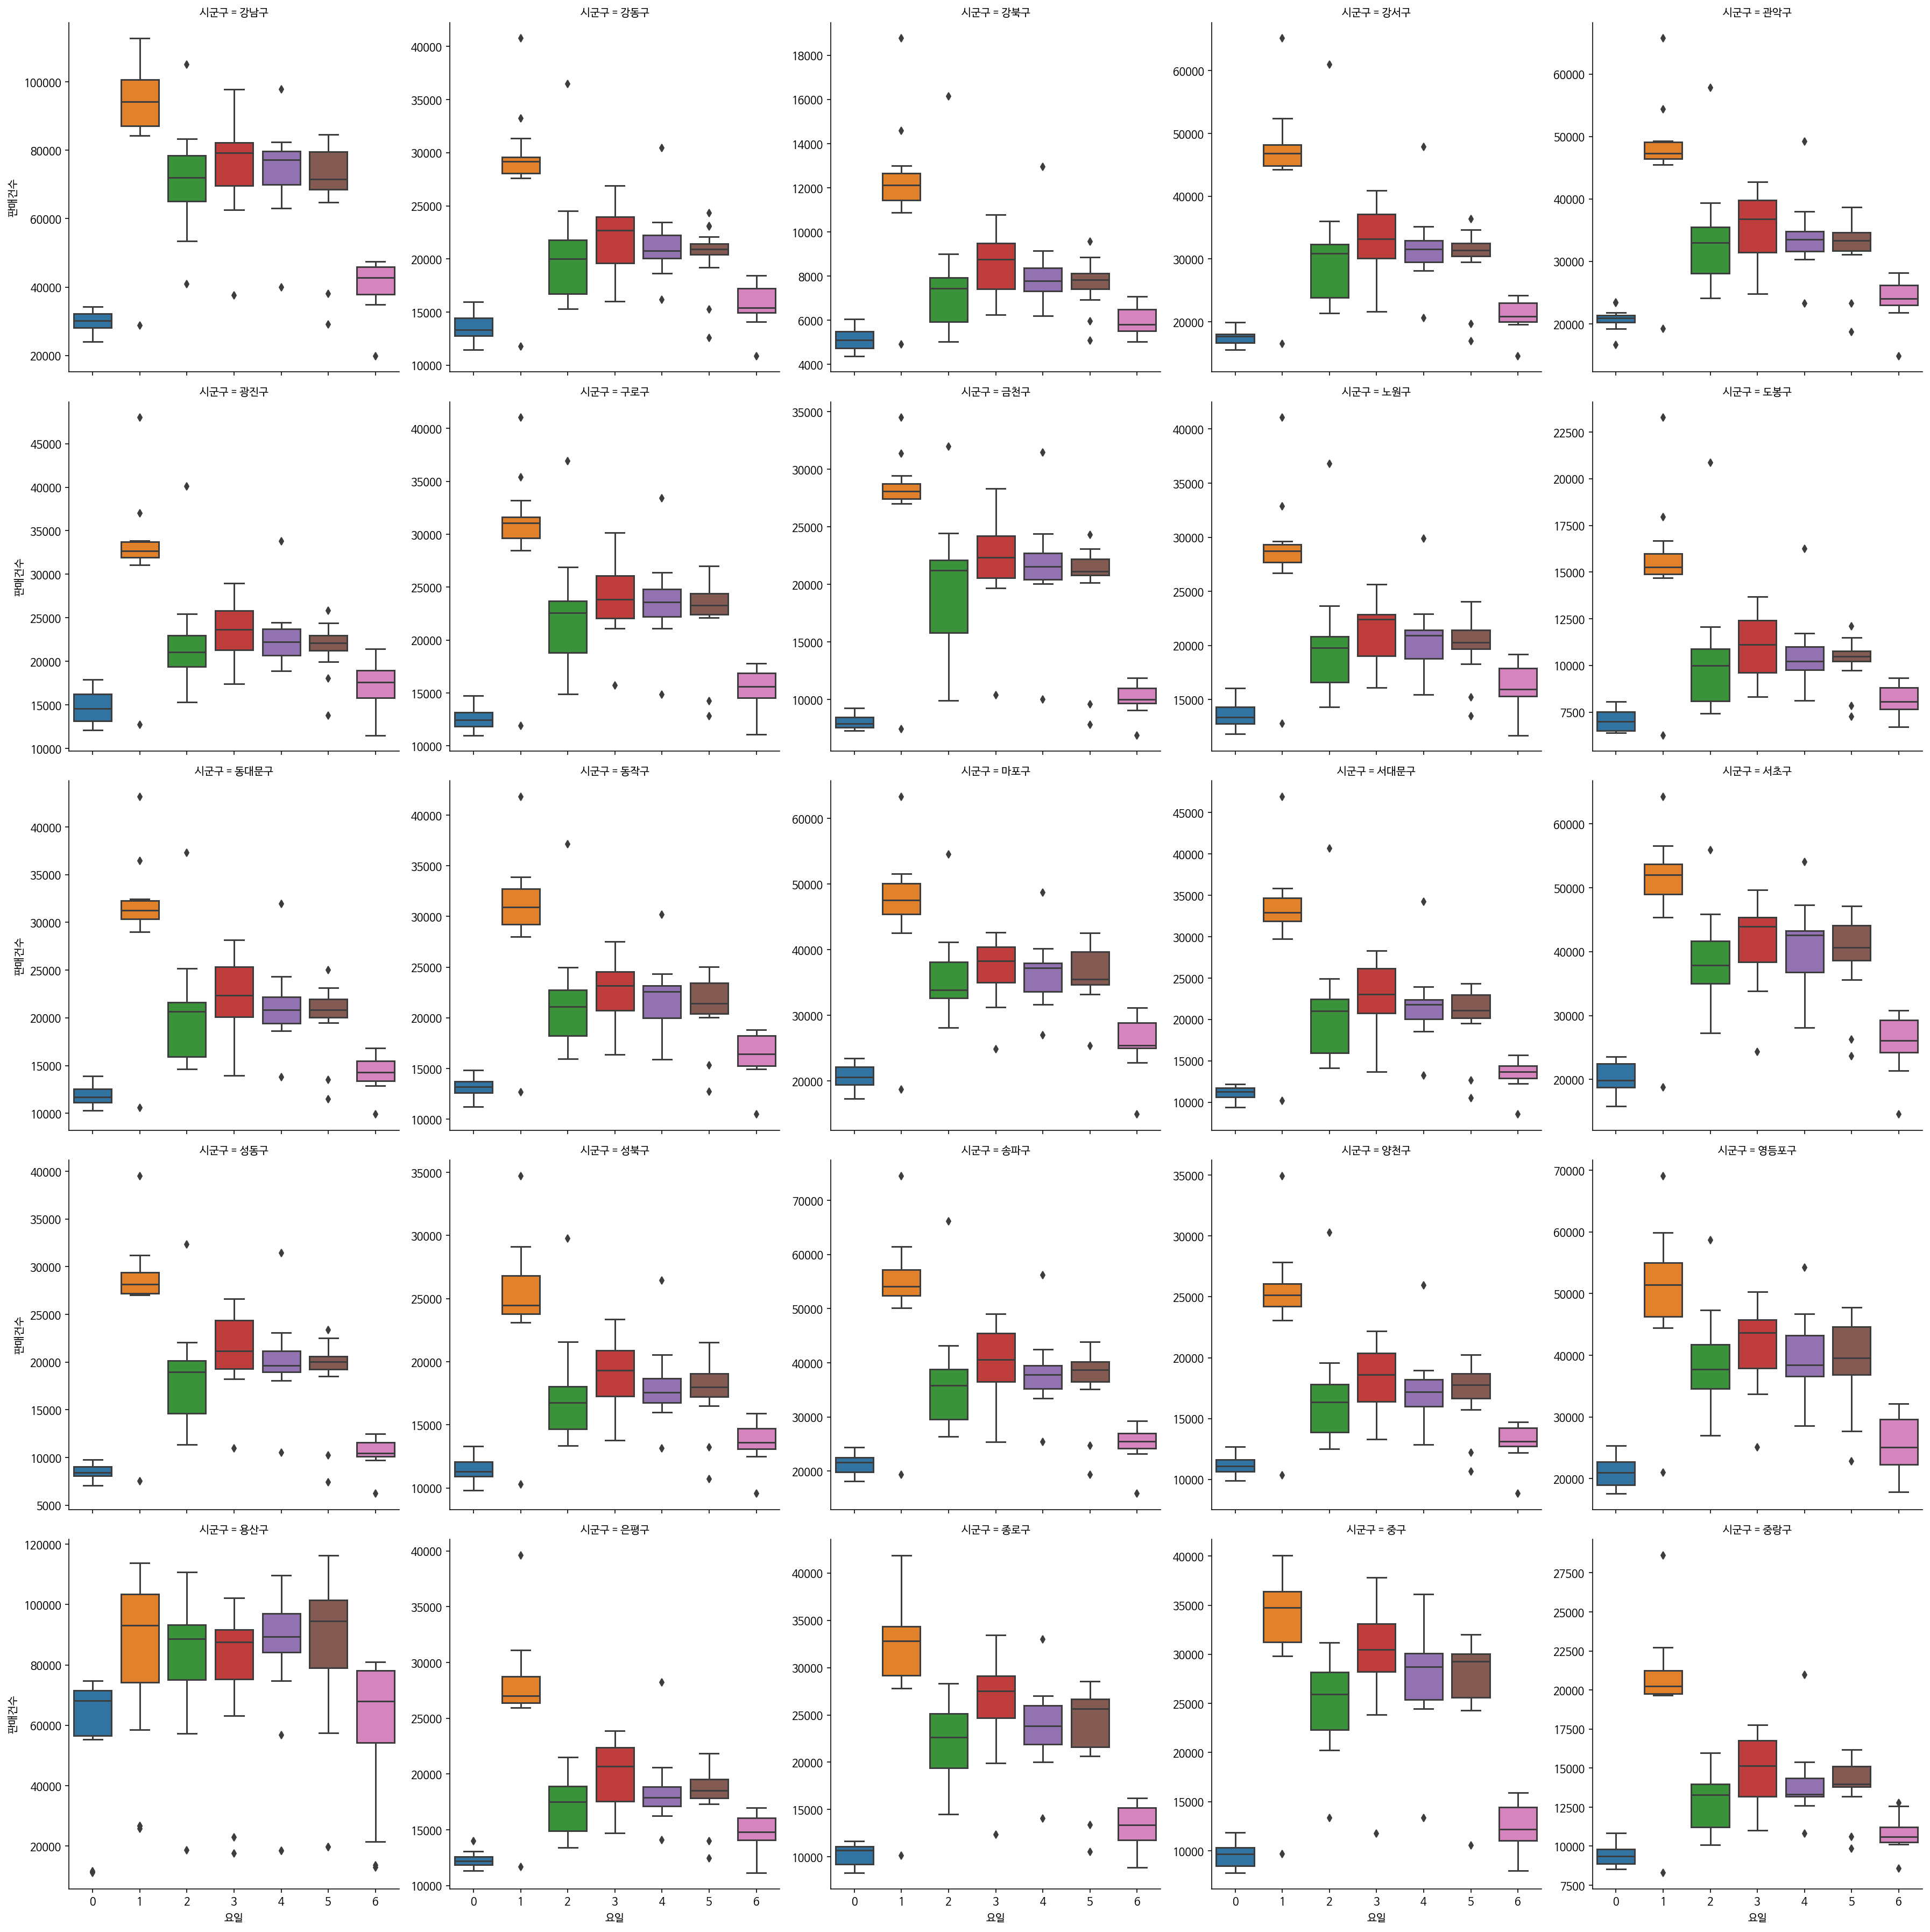

time: 8.94 s


In [ ]:
sns.catplot(data = df[(df['업종명'] == '편의점')], x = '요일', y = '판매건수', col = '시군구', col_wrap = 5, kind = 'box', sharey = False)

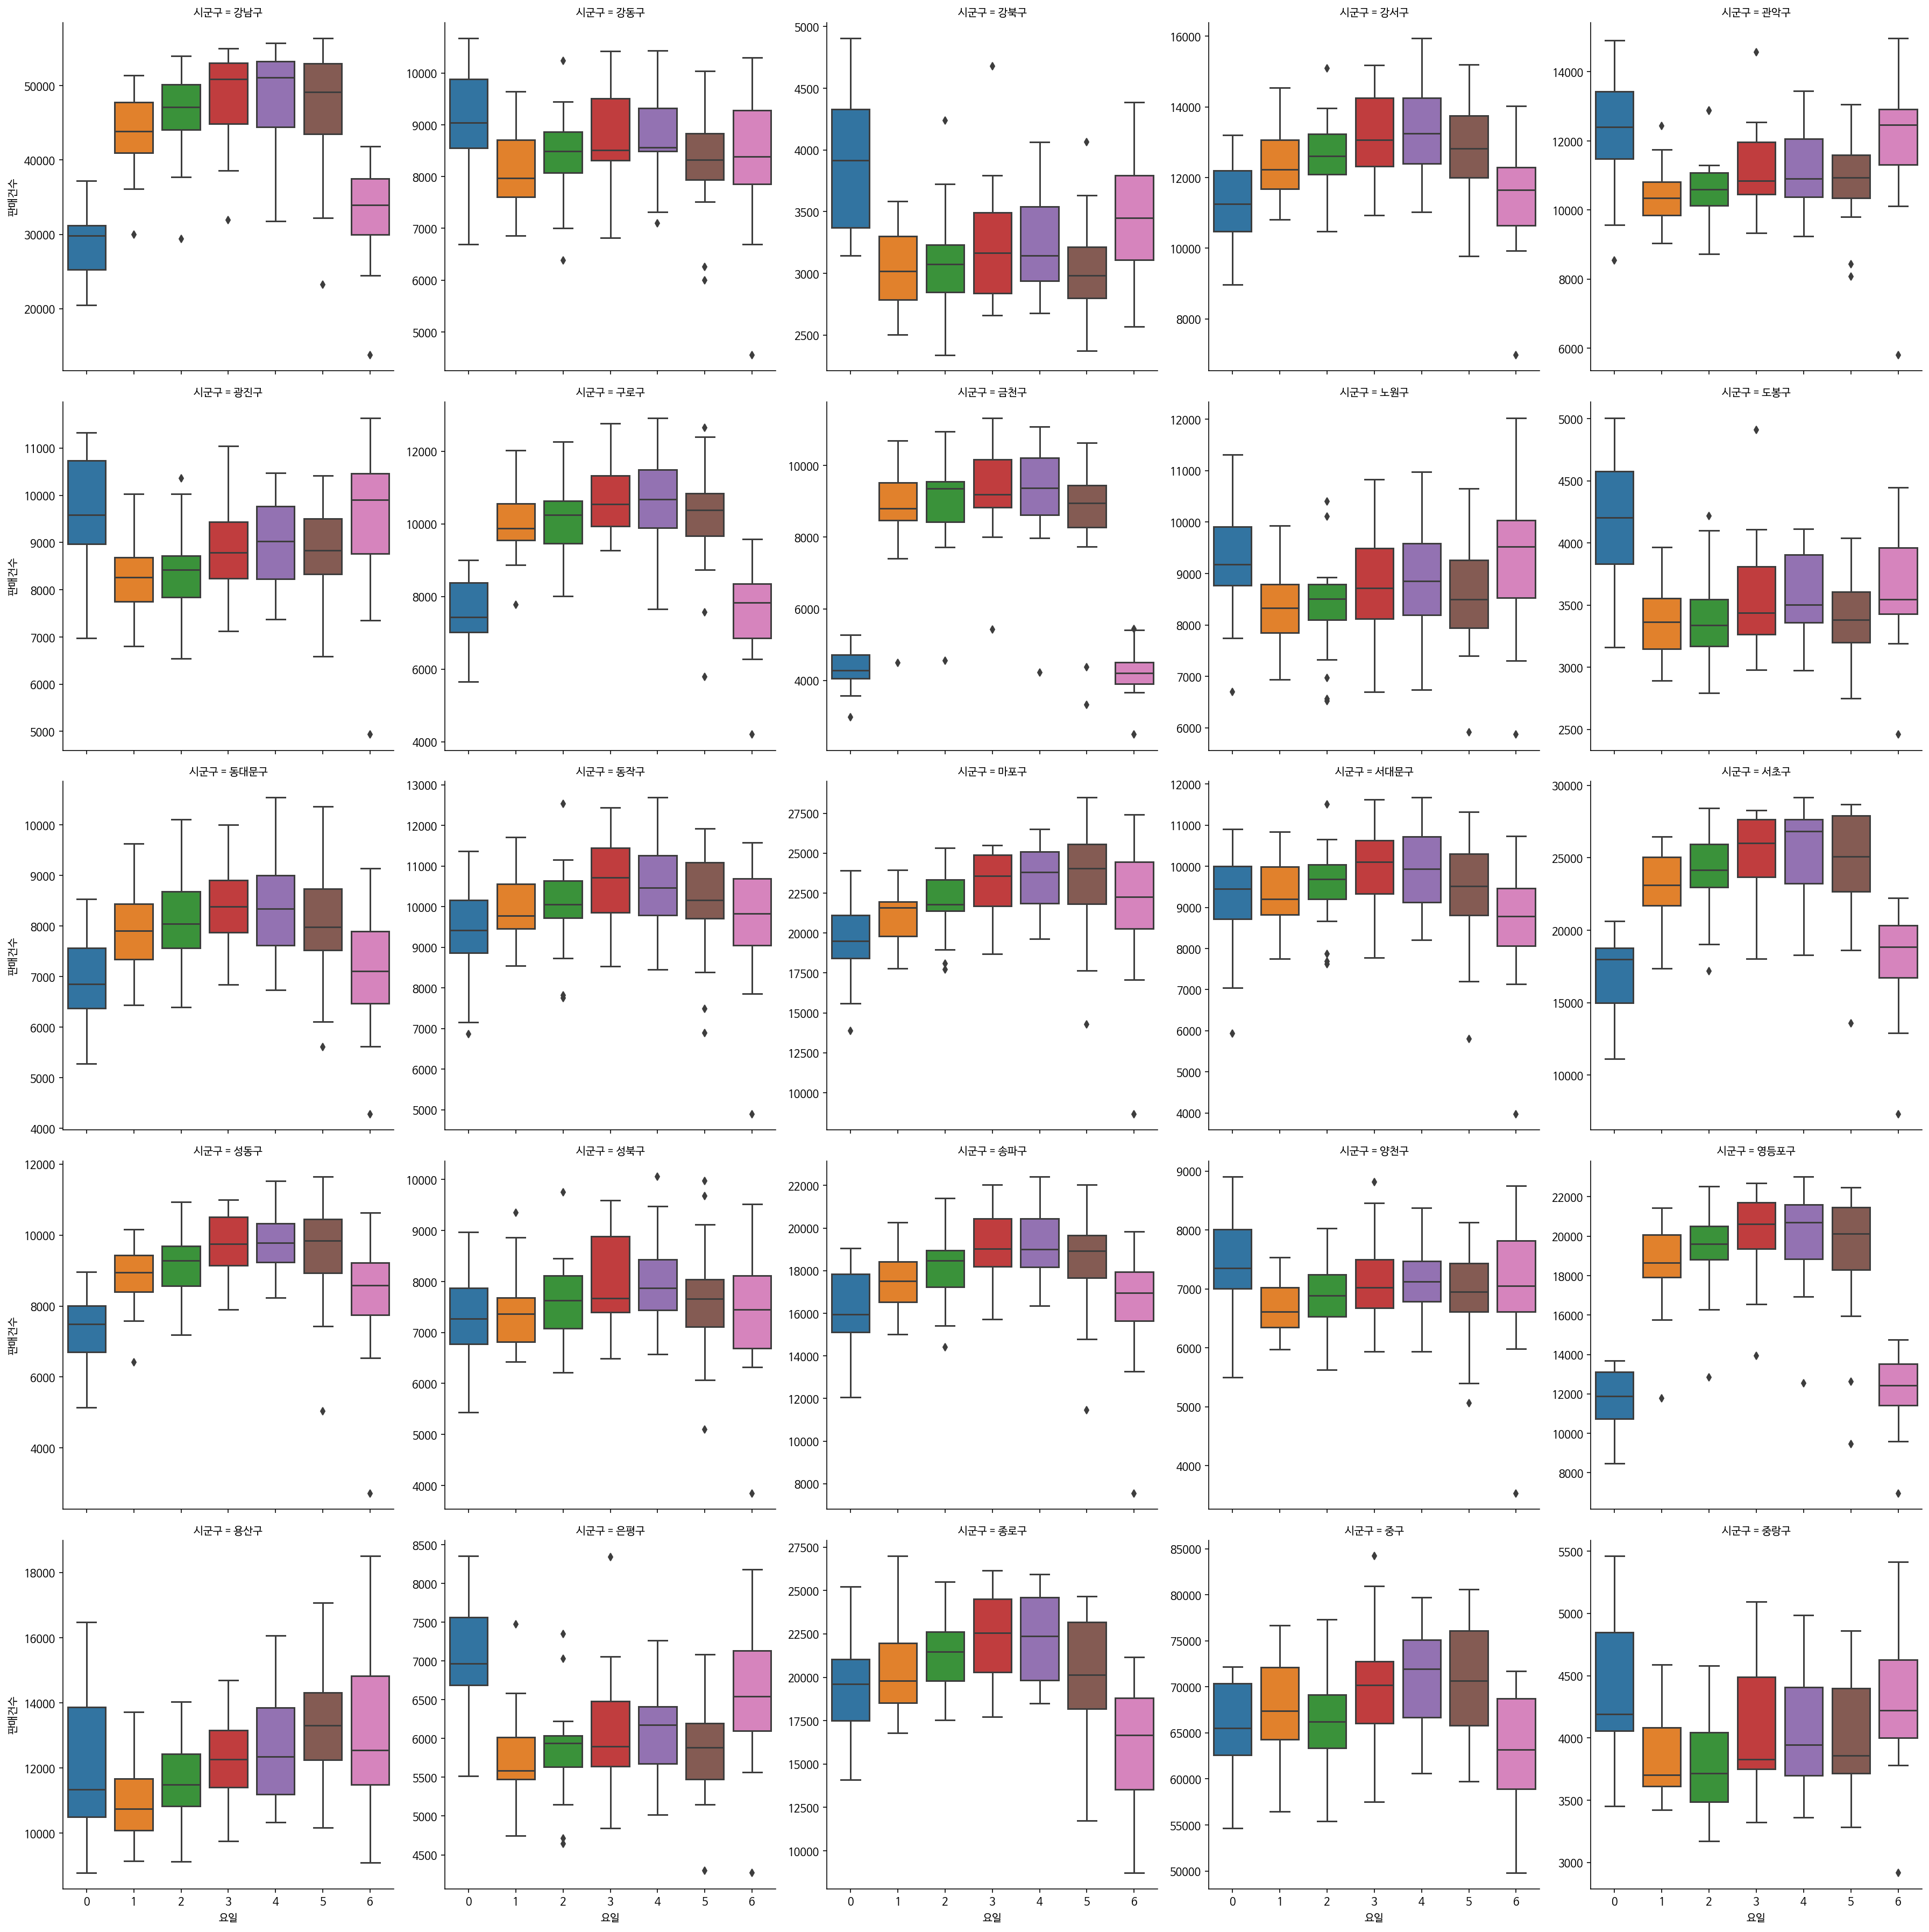

time: 8.88 s


In [ ]:
sns.catplot(data = df[(df['업종명'] == '서양음식')], x = '요일', y = '판매건수', col = '시군구', col_wrap = 5, kind = 'box', sharey = False)

# 판매건수 주기

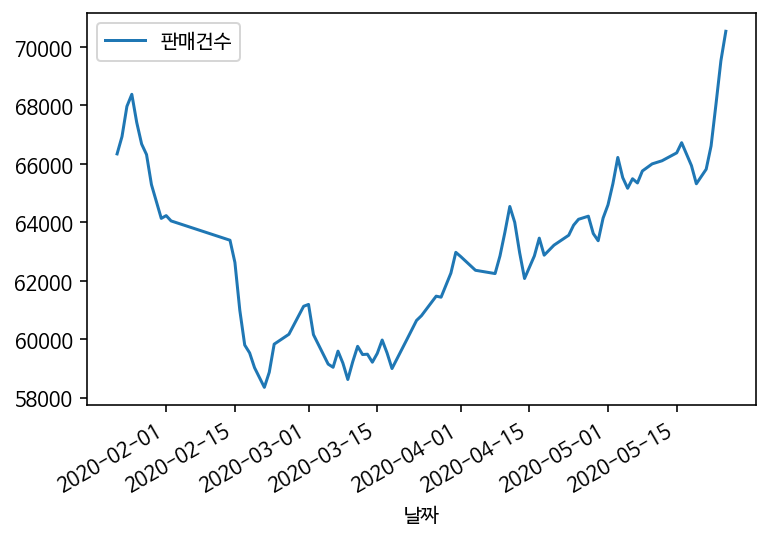

time: 337 ms


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(x = df[(df['업종명'] == '편의점') & (df['시군구'] == '강남구')][['날짜', '판매건수']].set_index('날짜'), freq = 30).trend.plot()

In [ ]:
def plot_upjong(upjong):
  plot_df = df[df['업종명'] == upjong][['날짜', '시군구', '판매건수']]
  sns.relplot(data = plot_df, x = '날짜', y = '판매건수', col = '시군구', col_wrap = 3, 
              ci = None, kind = 'line', facet_kws = {'sharex': False, 'sharey': False})
  plt.legend(labels = [si])

time: 3.1 ms


In [ ]:
df[(df['업종명'] == '인터넷P/G') & (df['시군구'] == '강남구')][['날짜', '판매건수']].set_index('날짜')

판매건수
날짜               
2020-01-04  28638
2020-01-05  13599
2020-01-06  84247
2020-01-07  79474
2020-01-08  56159
...           ...
2020-06-10  53004
2020-06-11  56258
2020-06-12  72741
2020-06-13  37357
2020-06-14  13106

[155 rows x 1 columns]

time: 70.1 ms


In [ ]:
trend = df[(df['업종명'] == '인터넷P/G') & (df['시군구'] == '강남구')][['날짜', '판매건수']]
trend[trend['날짜'].isin(pd.date_range('20200204', '20200213'))]

날짜   판매건수
38058 2020-02-05  48083
40059 2020-02-06  50811

time: 57.8 ms


In [ ]:
df[df['날짜'].isin(pd.date_range('20200207', '20200213'))]

Empty DataFrame
Columns: [날짜, 업종명, 시군구, 판매건수, 매출액, 유동인구, 업계, 확진자수, 요일, 이슈]
Index: []

time: 15.8 ms


시계열 그래프를 보았을때 2월 중순에 변동이 거의 없어보여 확인한 결과, 7일부터 13일의 데이터가 모든 업종에서 비어있음을 확인. 원본 데이터에서도 비어있어 데이터 자체의 문제인것으로 판단하여 비어있는 값들을 다음으로 존재하는 날짜의 값으로 채움

In [ ]:
trenddf = df[(df['업종명'] == '기타음료식품') & (df['시군구'] == '강남구')][['날짜', '판매건수']].set_index('날짜')
trenddf = trenddf.asfreq('d')
trenddf = trenddf.fillna(method='bfill').fillna(method='ffill')
trenddf.loc[(pd.date_range('20200204', '20200213'))]

판매건수
2020-02-04  3129.0
2020-02-05  3129.0
2020-02-06  2920.0
2020-02-07  3287.0
2020-02-08  3287.0
2020-02-09  3287.0
2020-02-10  3287.0
2020-02-11  3287.0
2020-02-12  3287.0
2020-02-13  3287.0

time: 60 ms


In [ ]:
trenddf

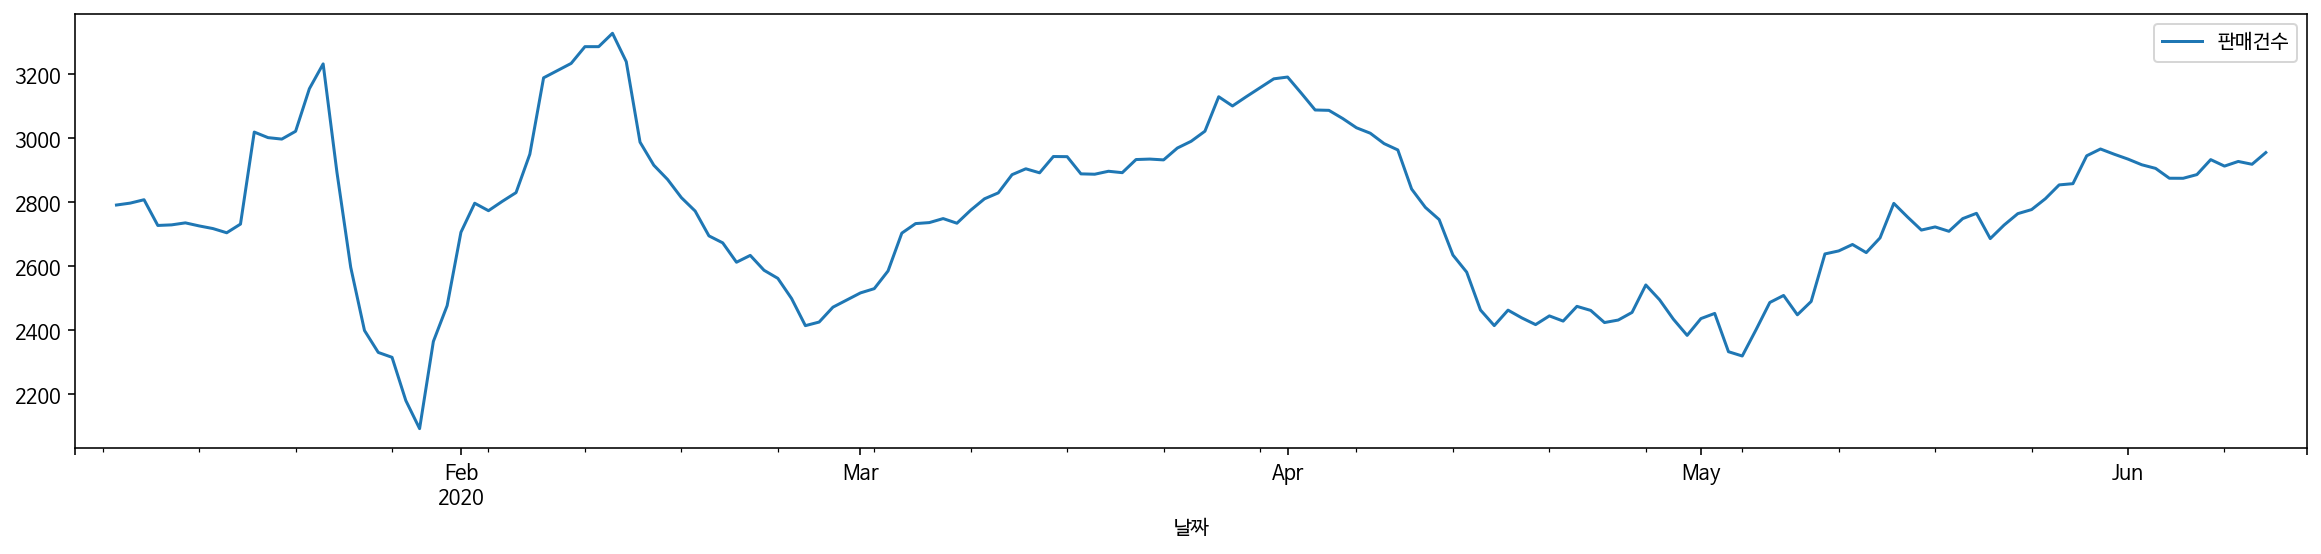

time: 463 ms


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(trenddf).trend.plot(figsize = (20, 4))

## 추정 회복세
분석을 진행하기 전, 각자 회복세를 띄고 있을거라 예상되는 업종들과 그렇지 않은 업종명을 정리해 시각화


In [ ]:
# 올랐을것 같은 업종명
up = ['주유소', '자동차서비스', '장례서비스', '약국', '생명보험', '택시', '성인용품점', '스크린골프', '골프연습장', '일반서적',
      '공공요금', '공공요금/대상', '혼례서비스', '특급호텔', '1급호텔', '중고자동차', '일반백화점']
# 내렸을것 같은 업종명
down = ['CATV홈쇼핑', '중국음식', '서양음식', '일반한식', '일식회집', '산후조리원', '정수기', '노래방', '수입자동차', '종합병원']

time: 2.32 ms


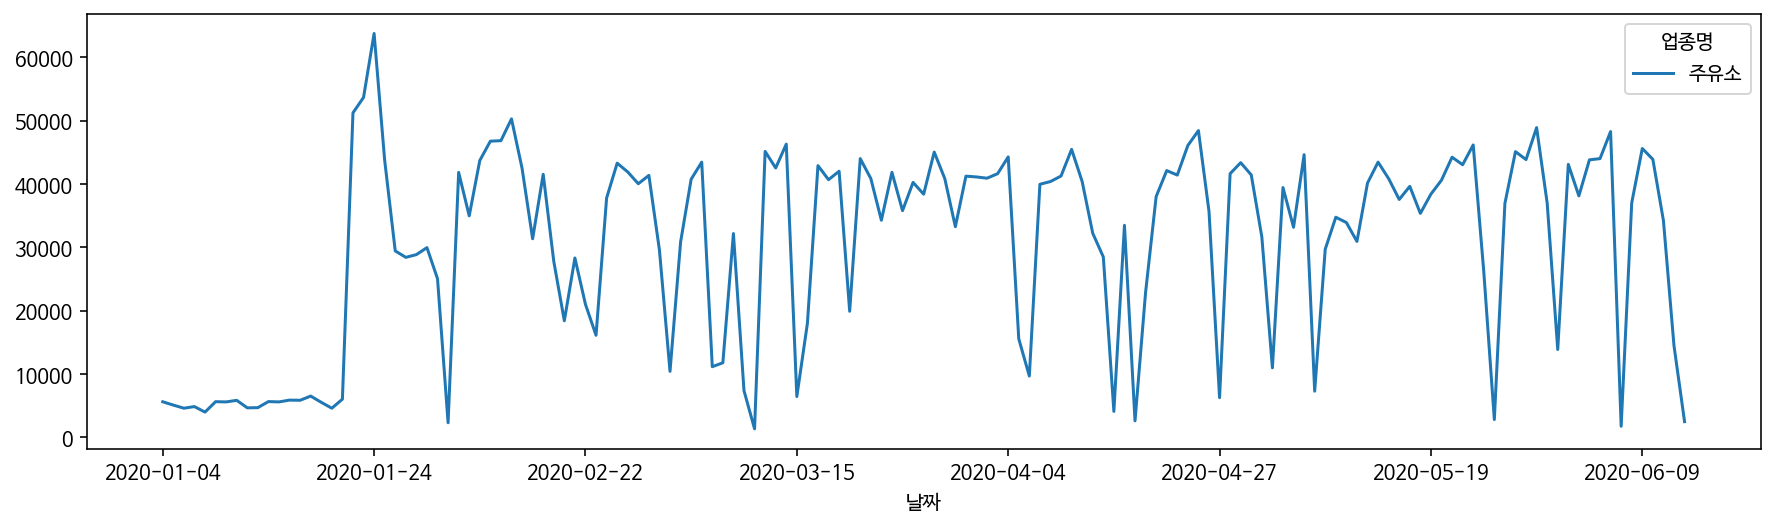

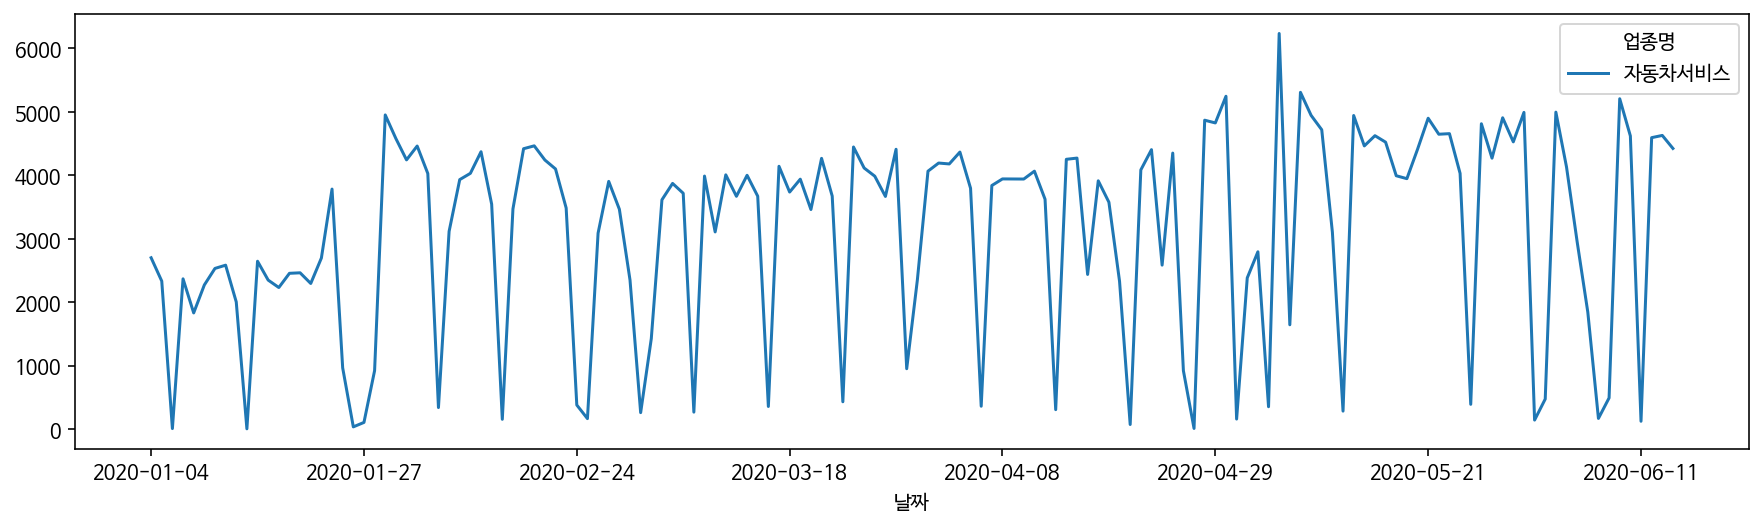

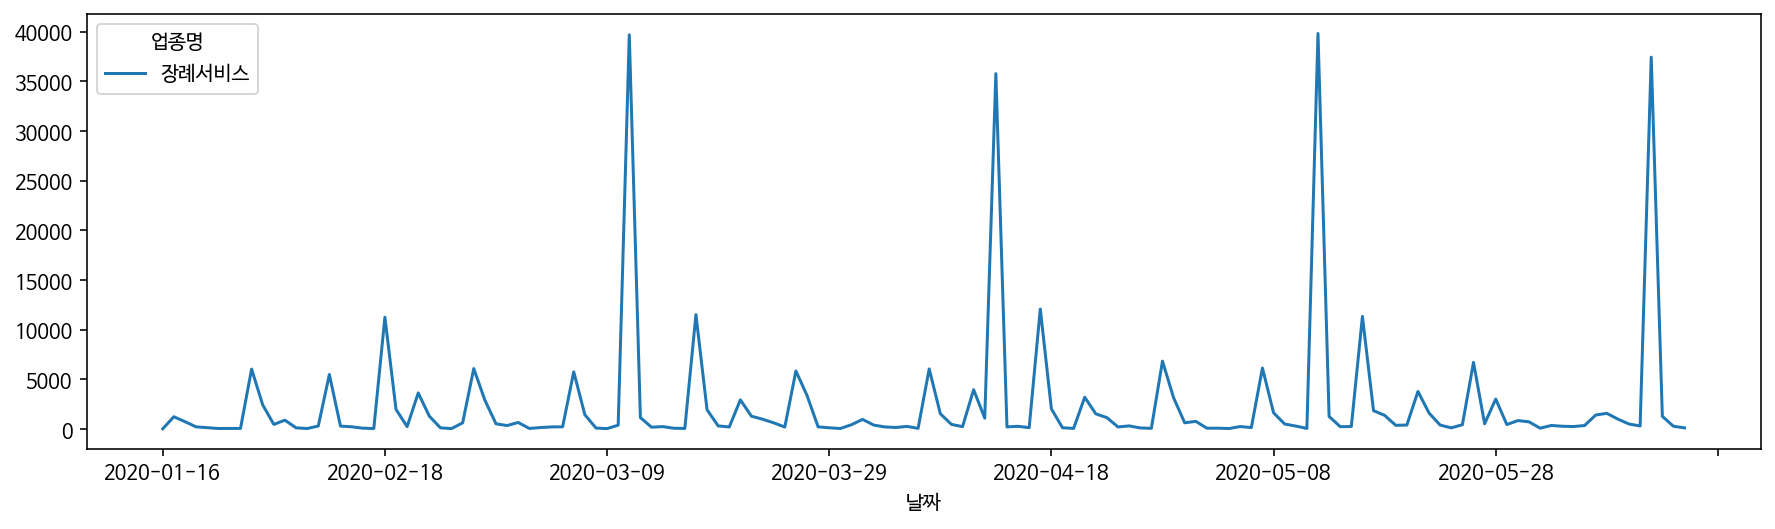

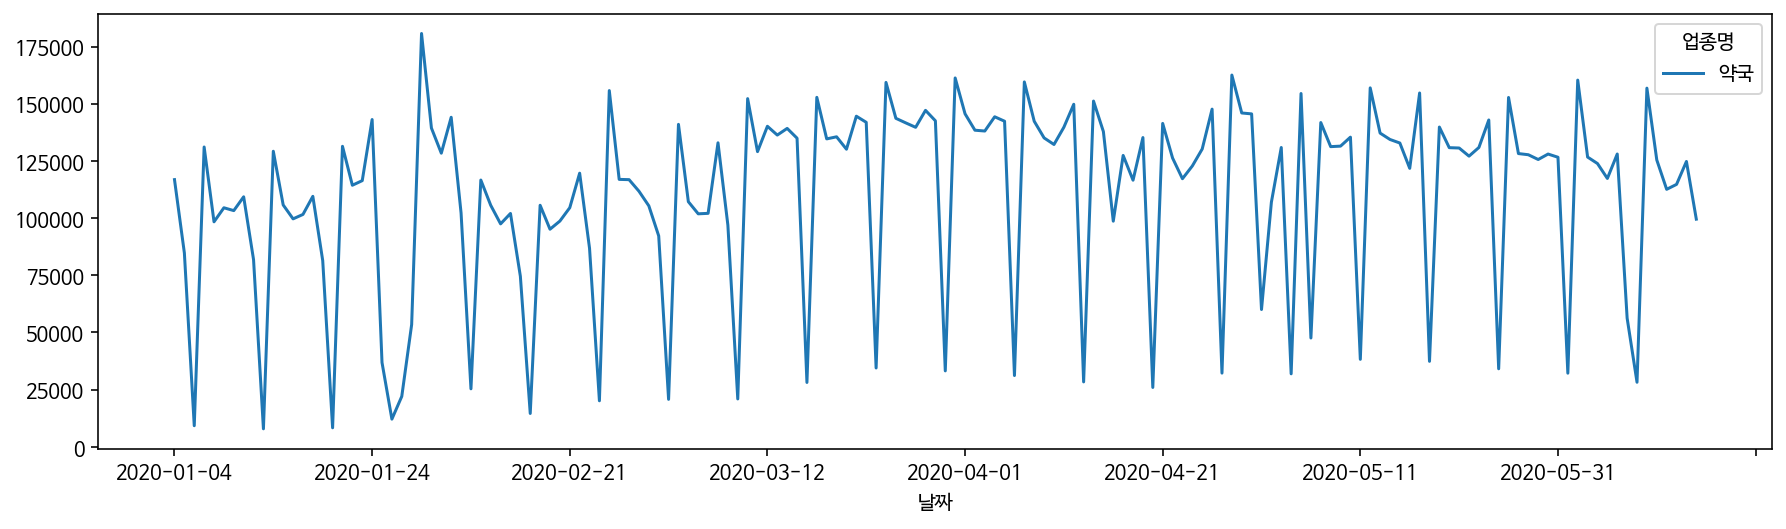

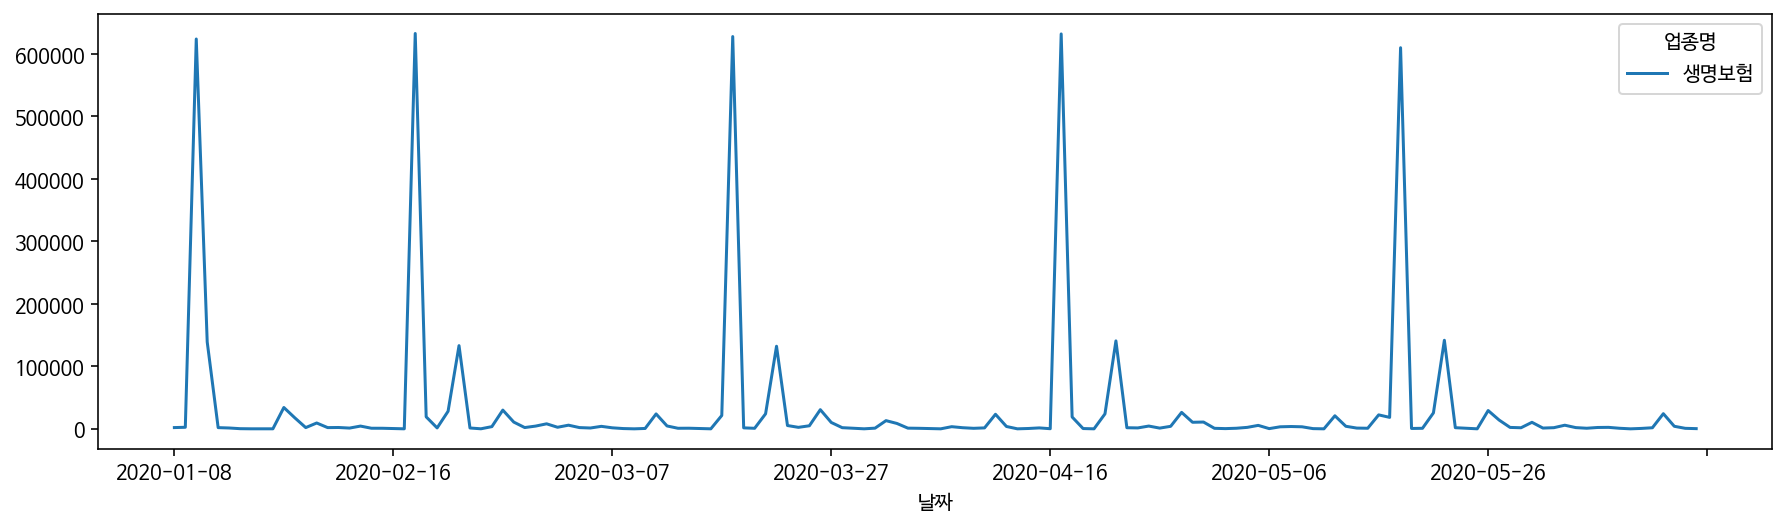

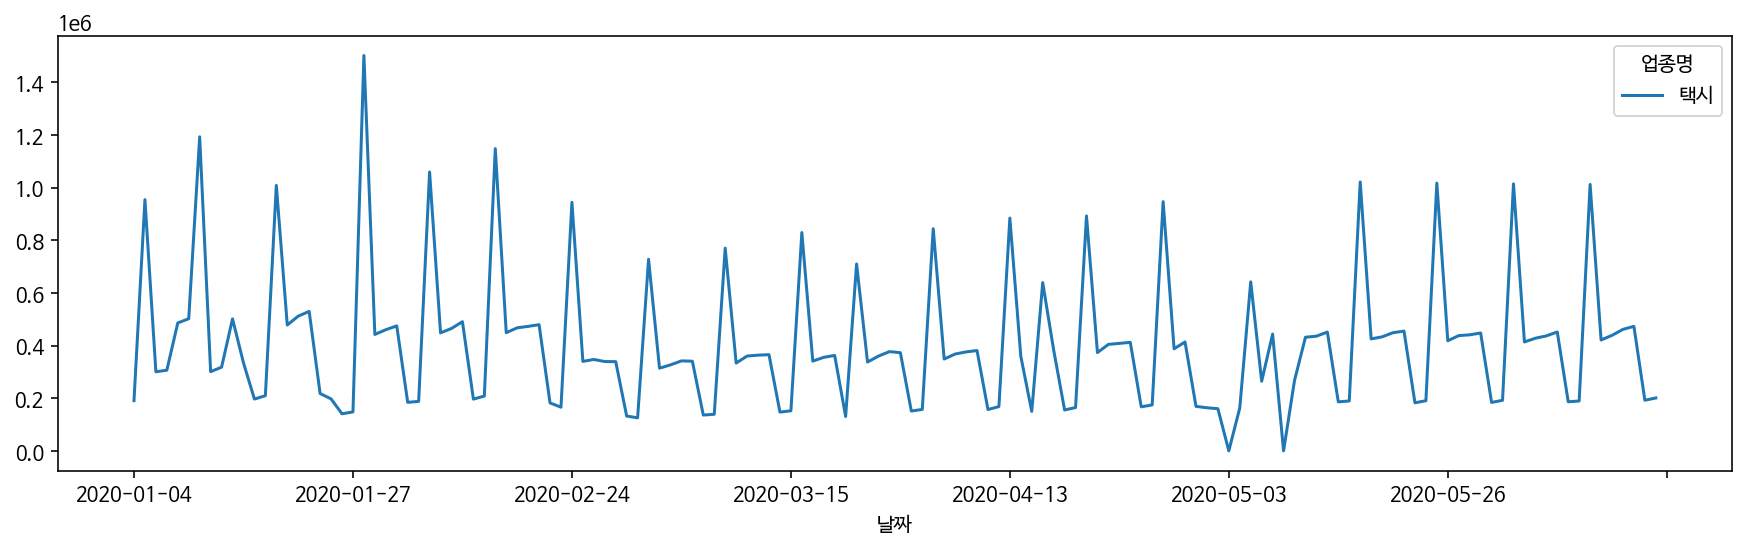

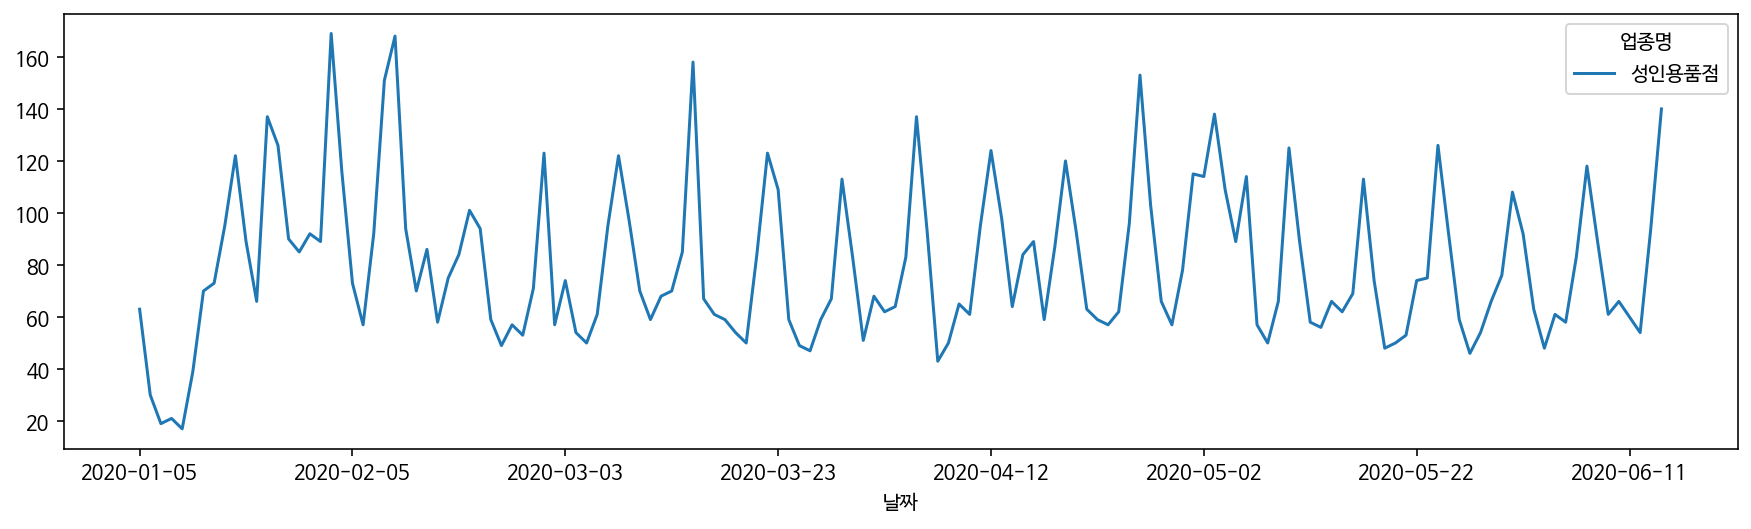

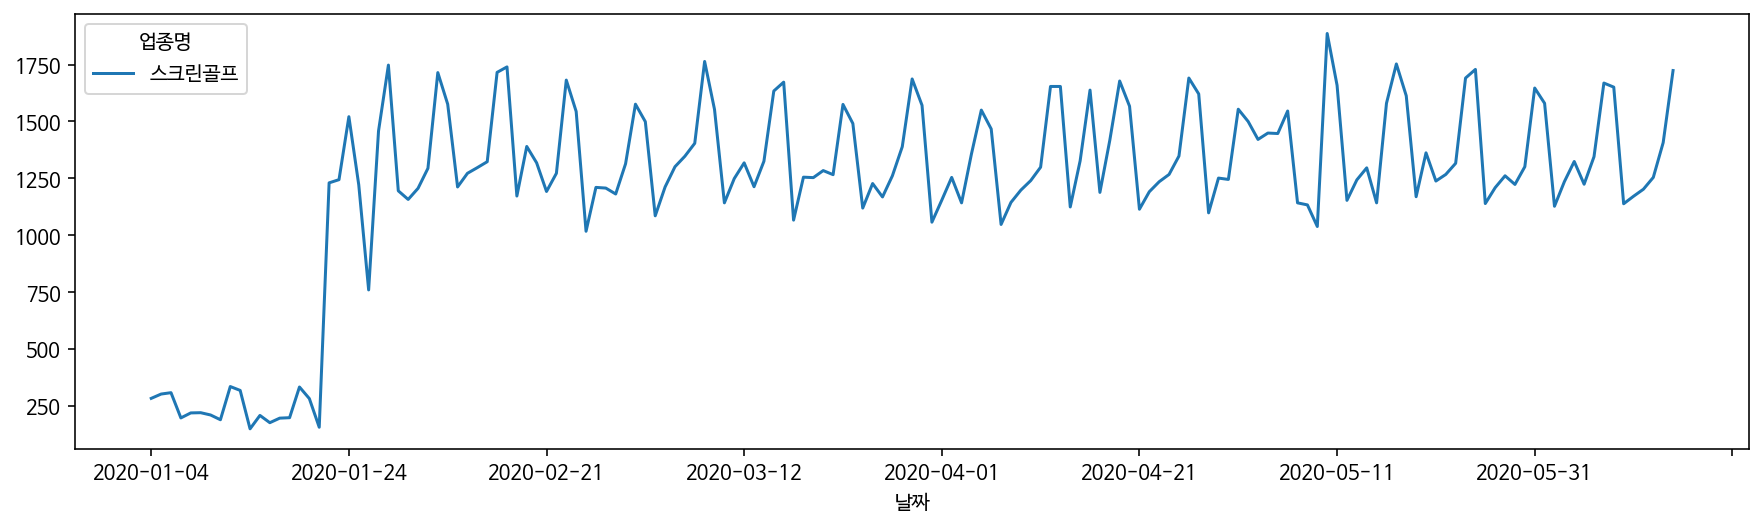

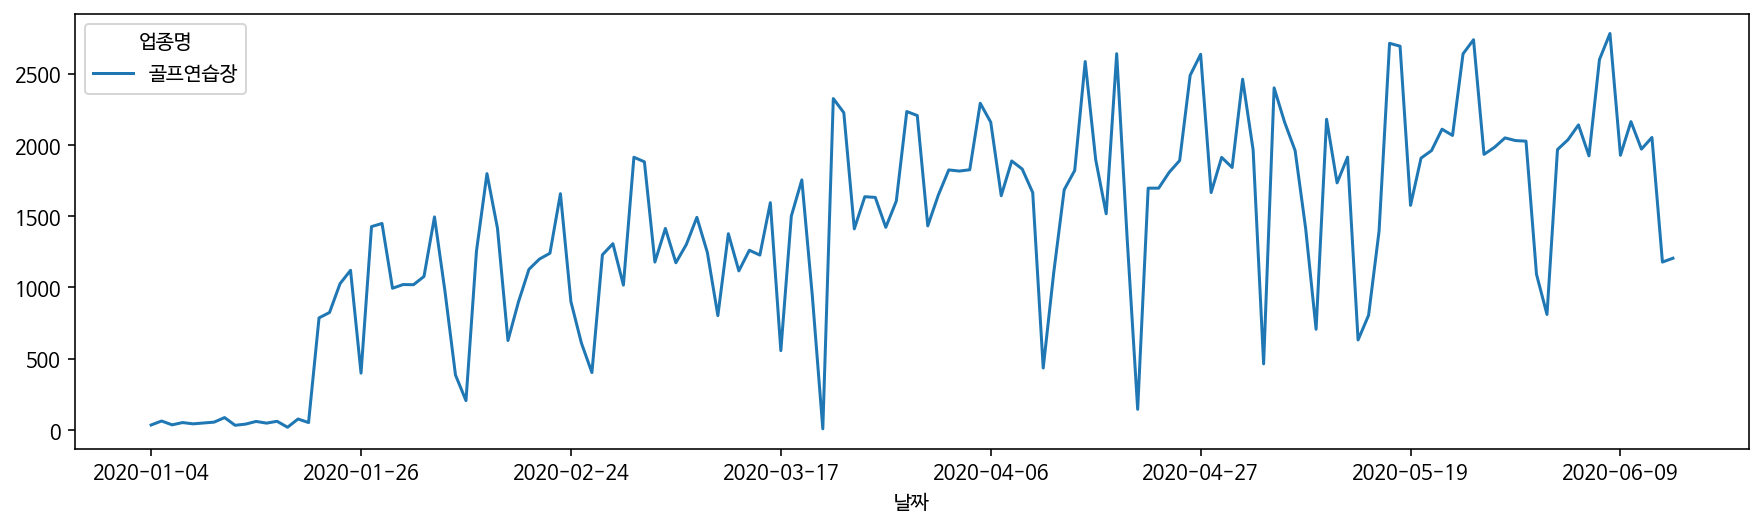

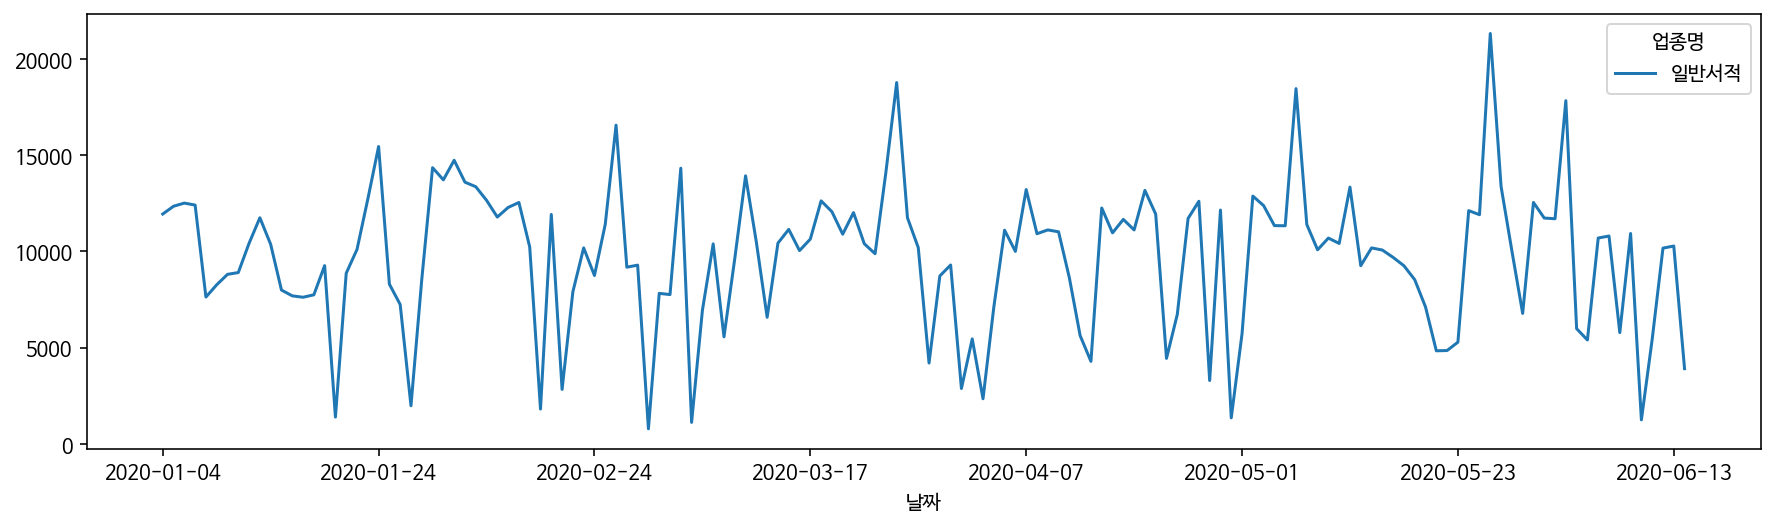

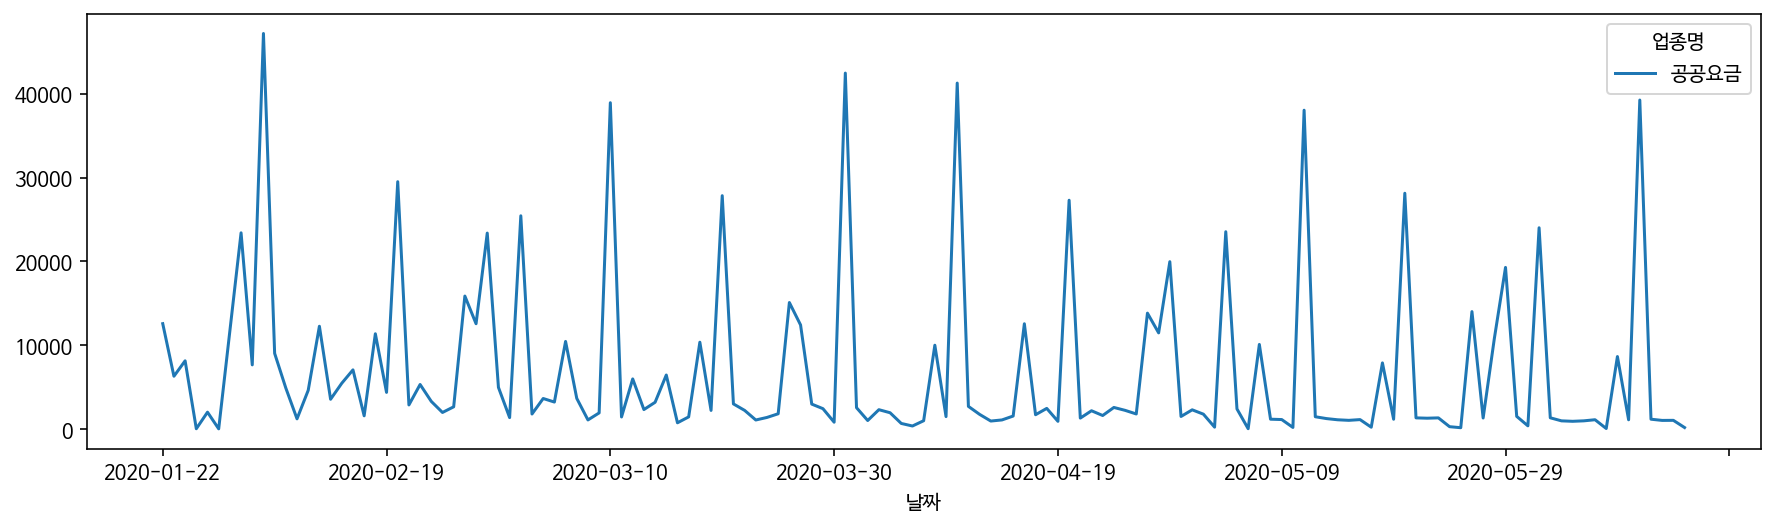

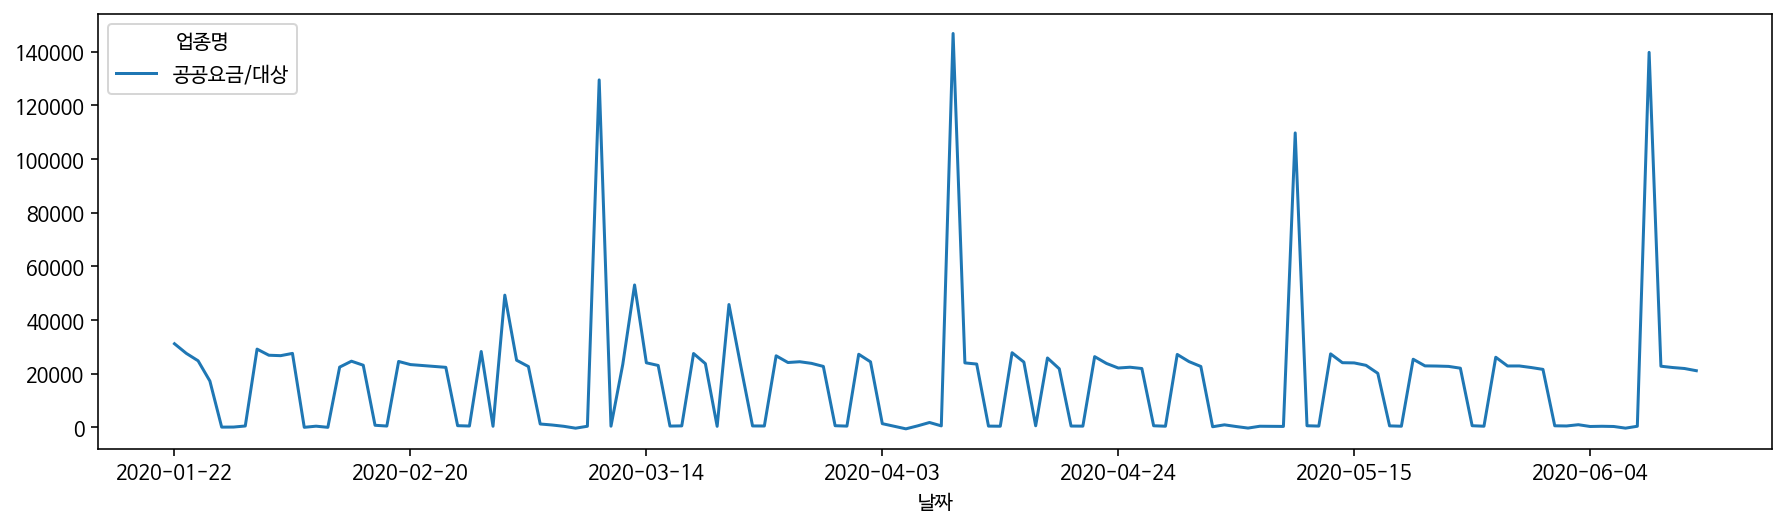

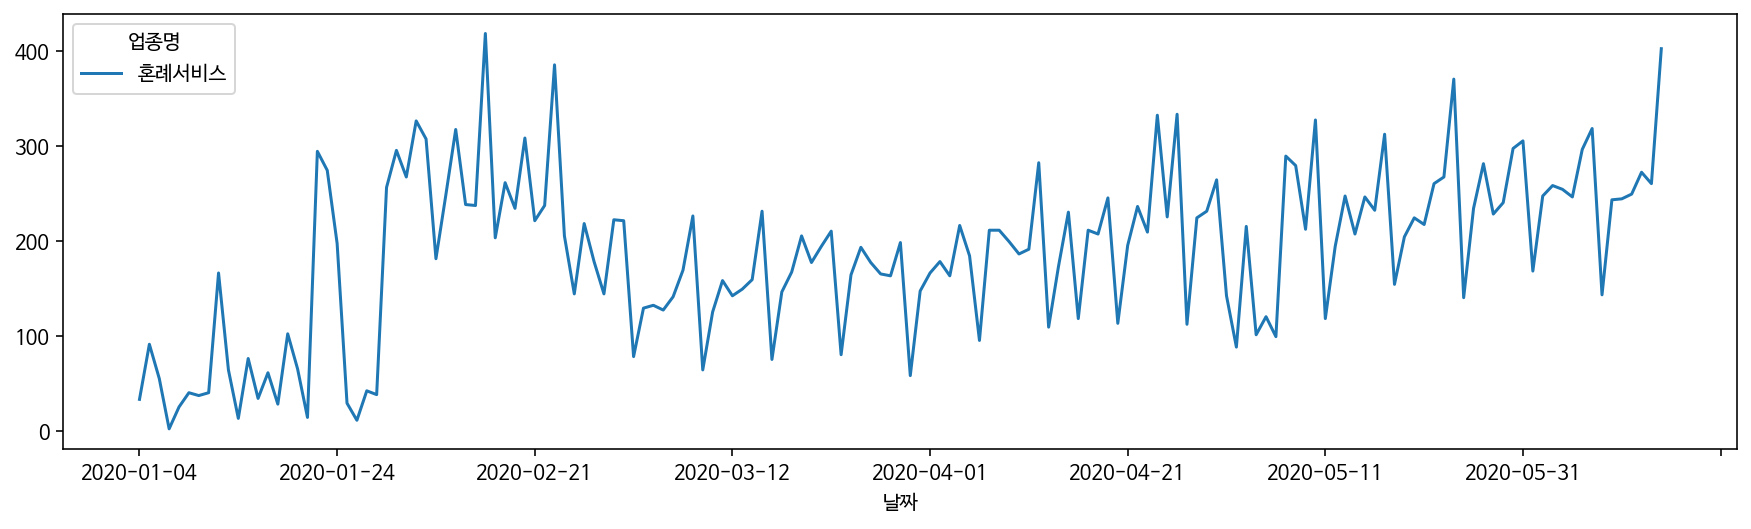

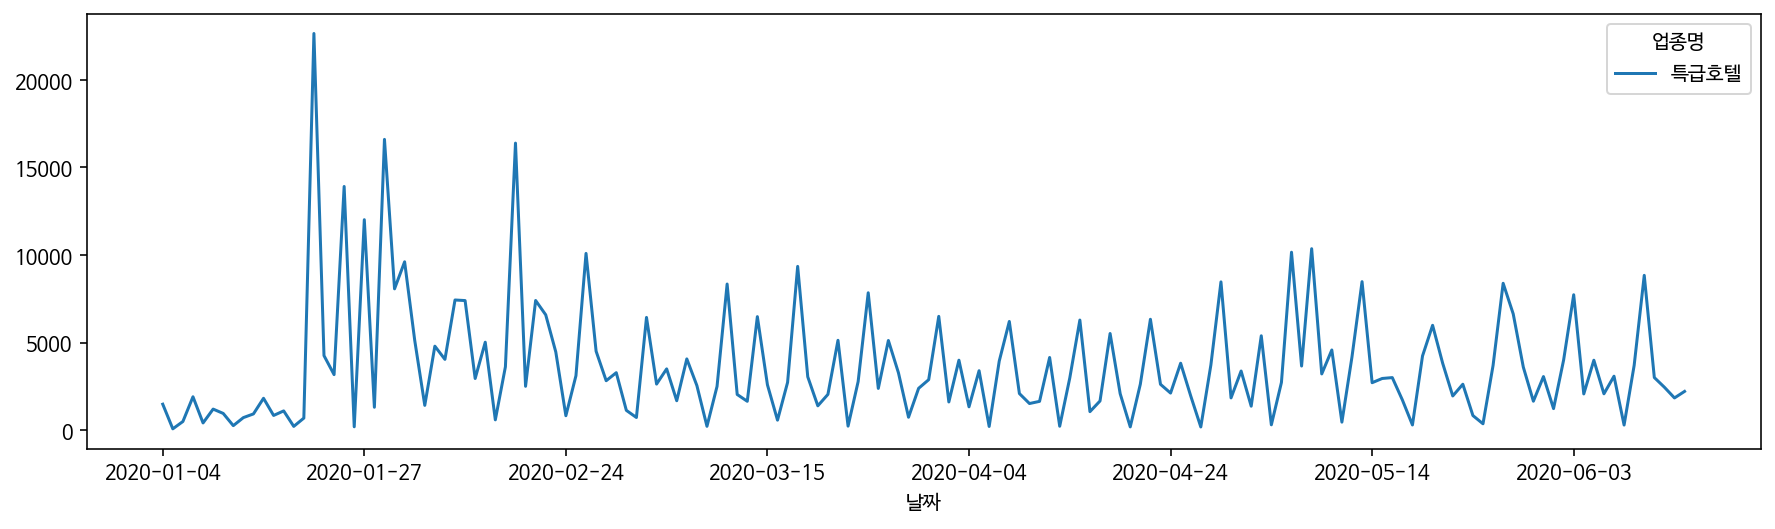

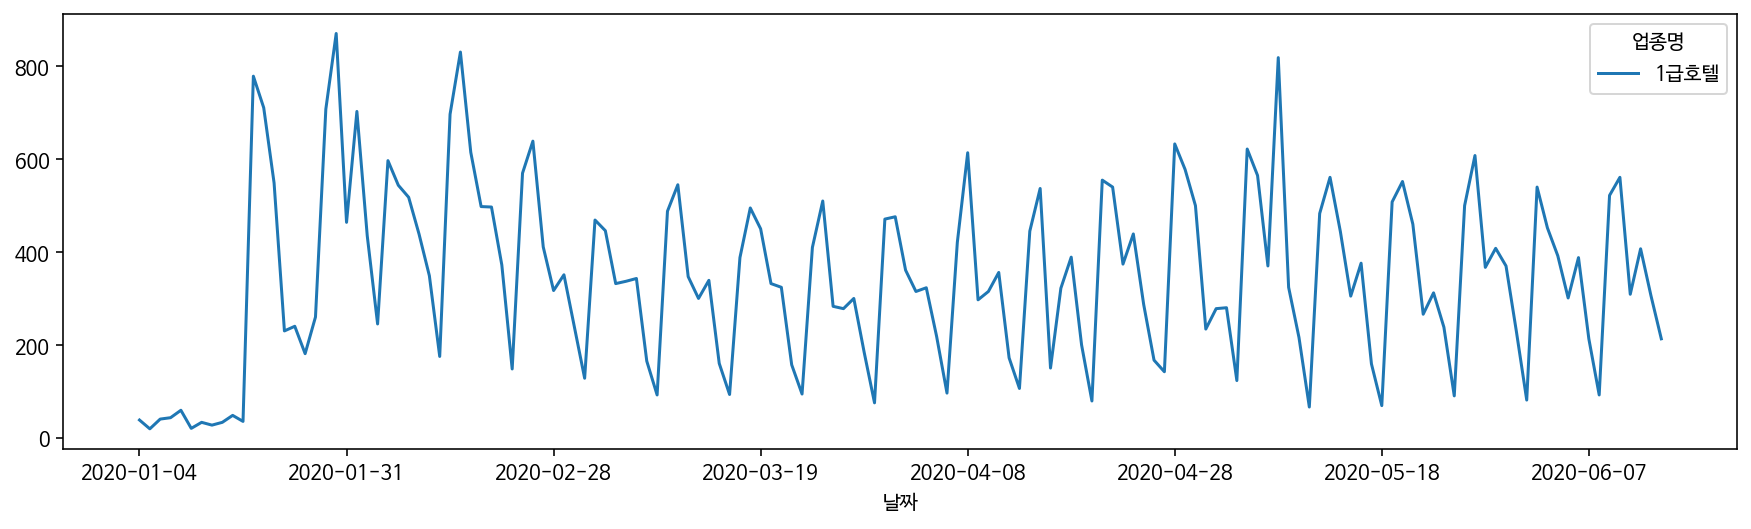

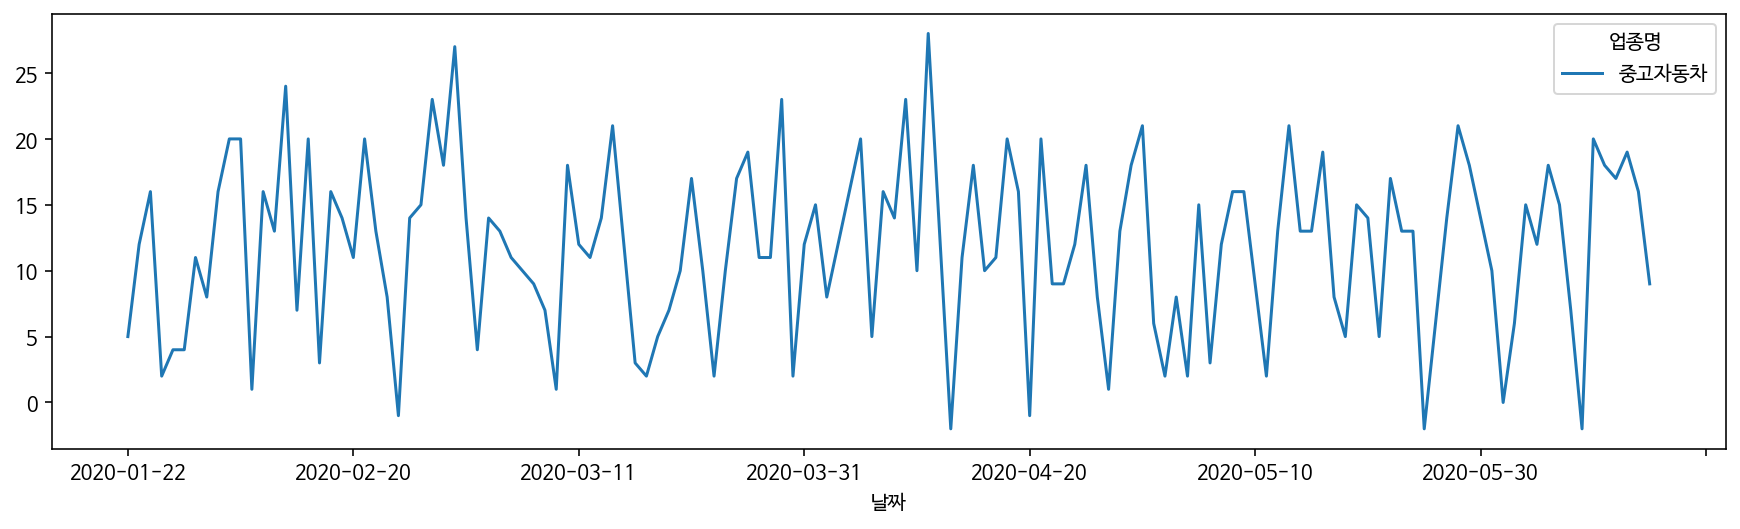

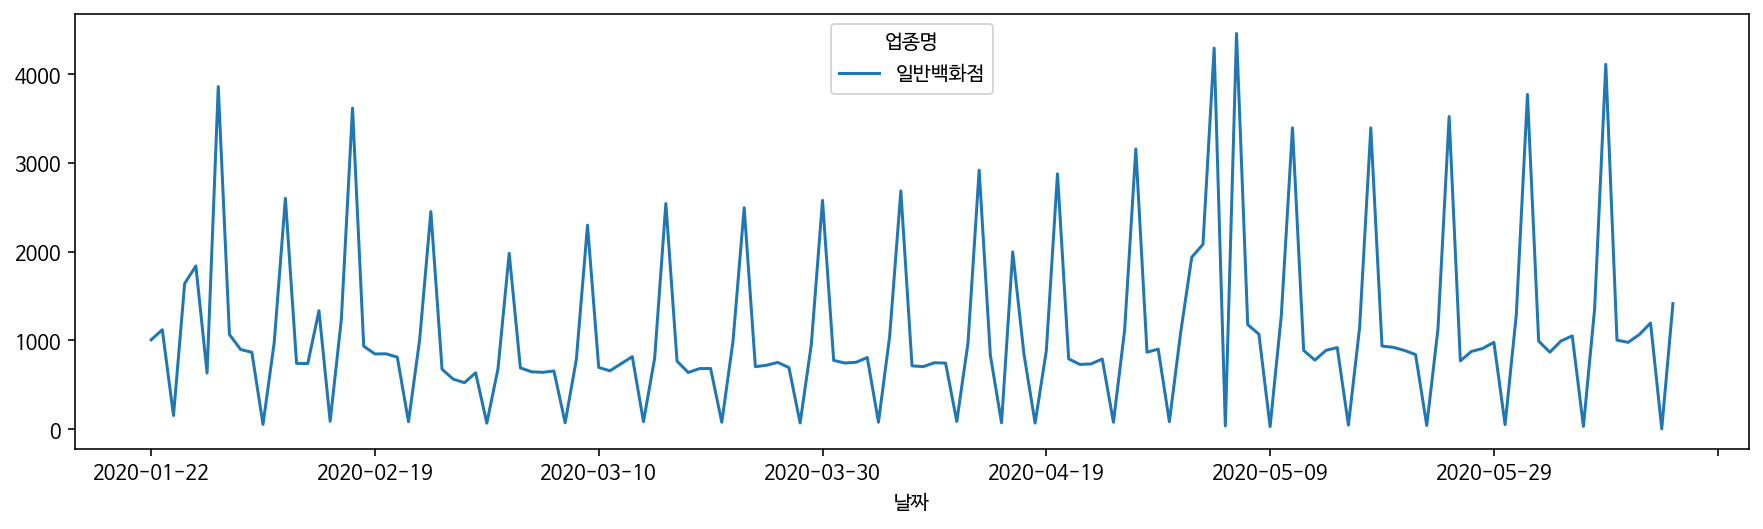

time: 5.88 s


In [ ]:
for i in range(len(up)):
  df[df['업종명'] == up[i]].pivot_table(index = '날짜', columns = '업종명', values = '판매건수', aggfunc = np.sum).plot(figsize = (15, 4))

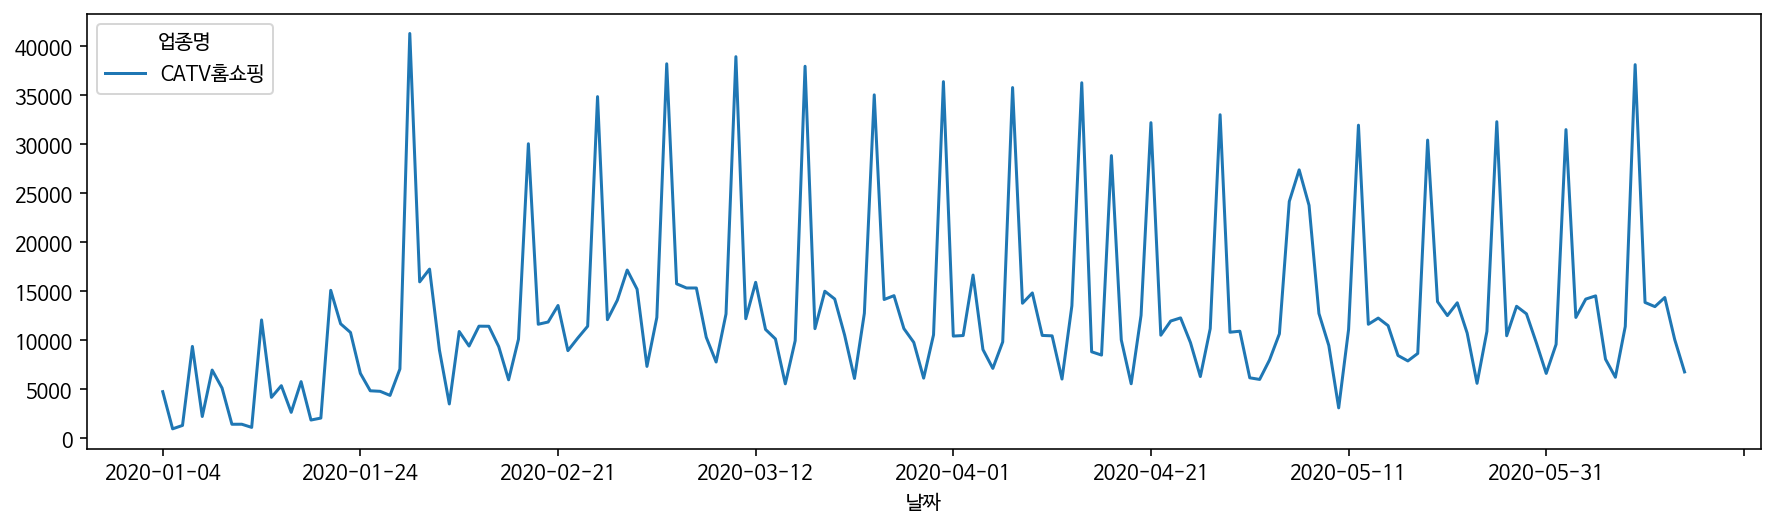

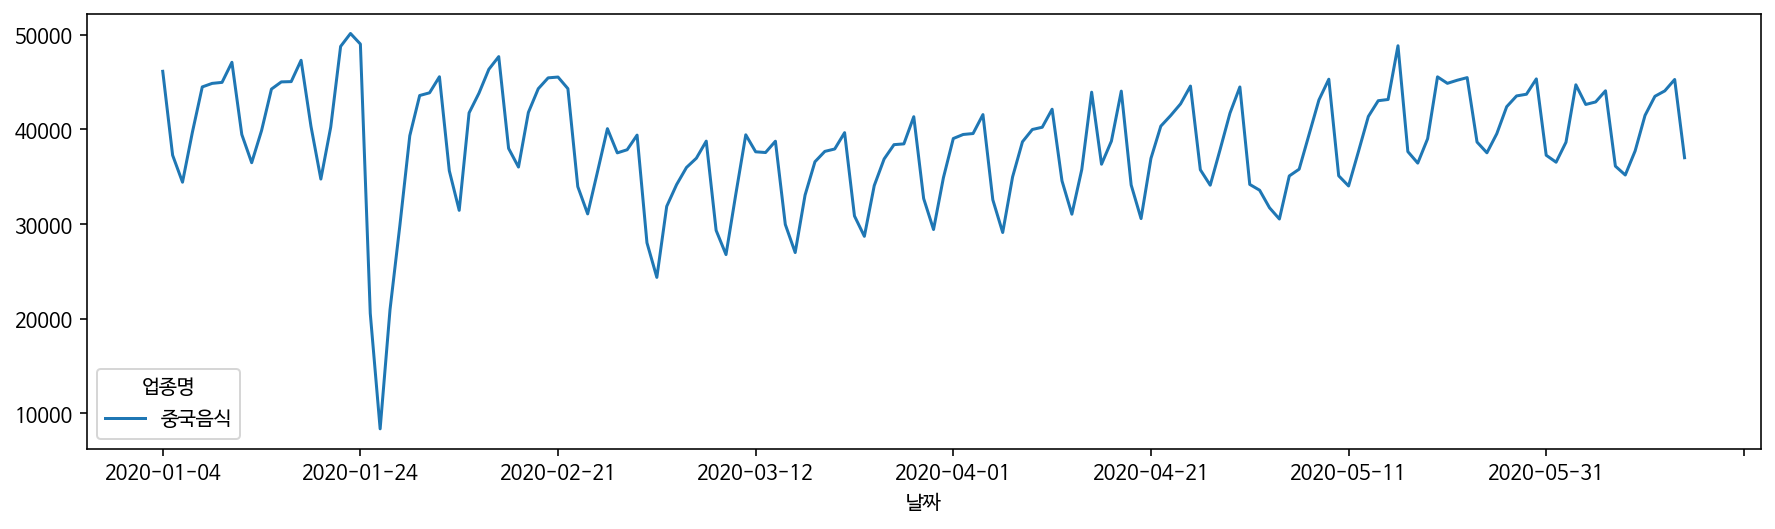

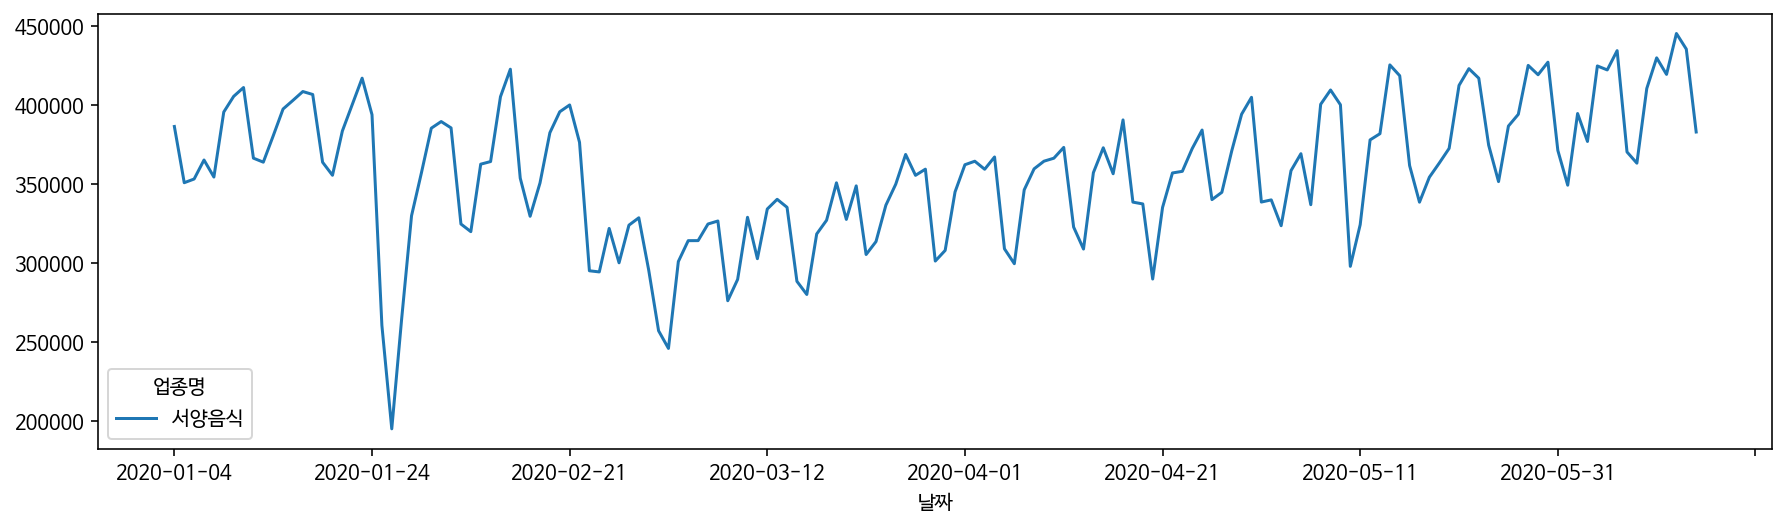

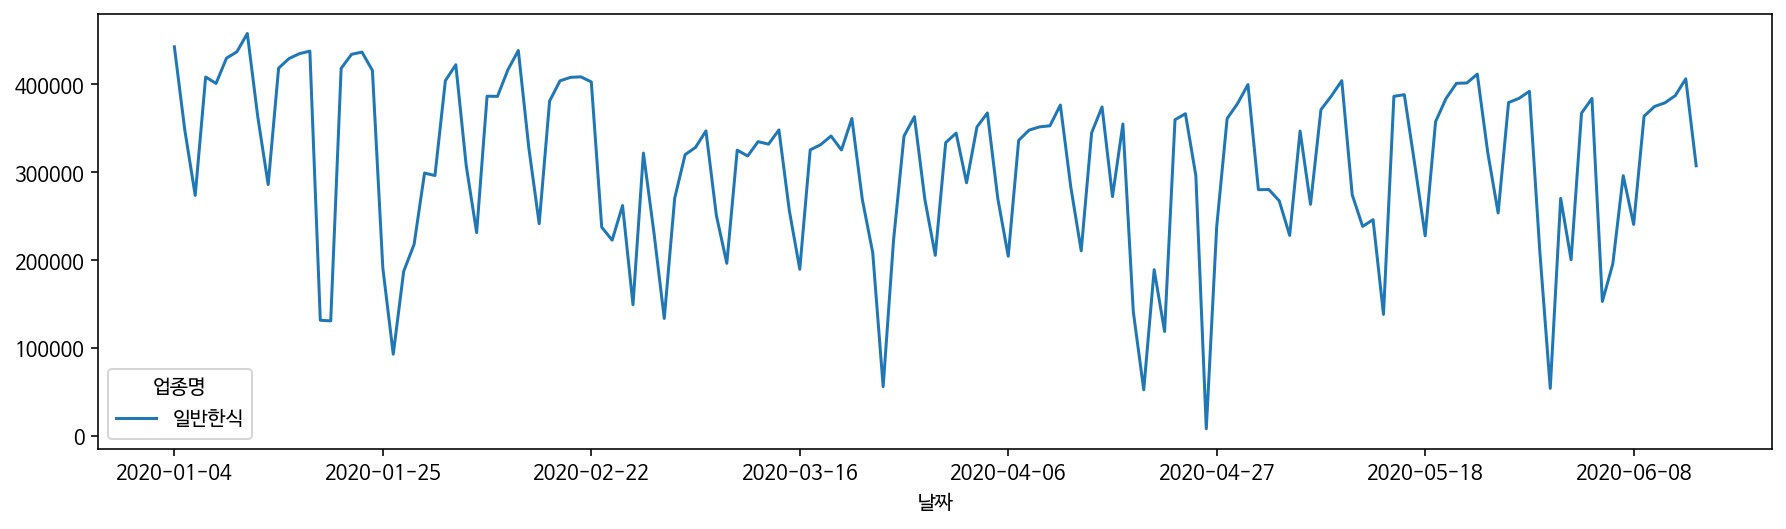

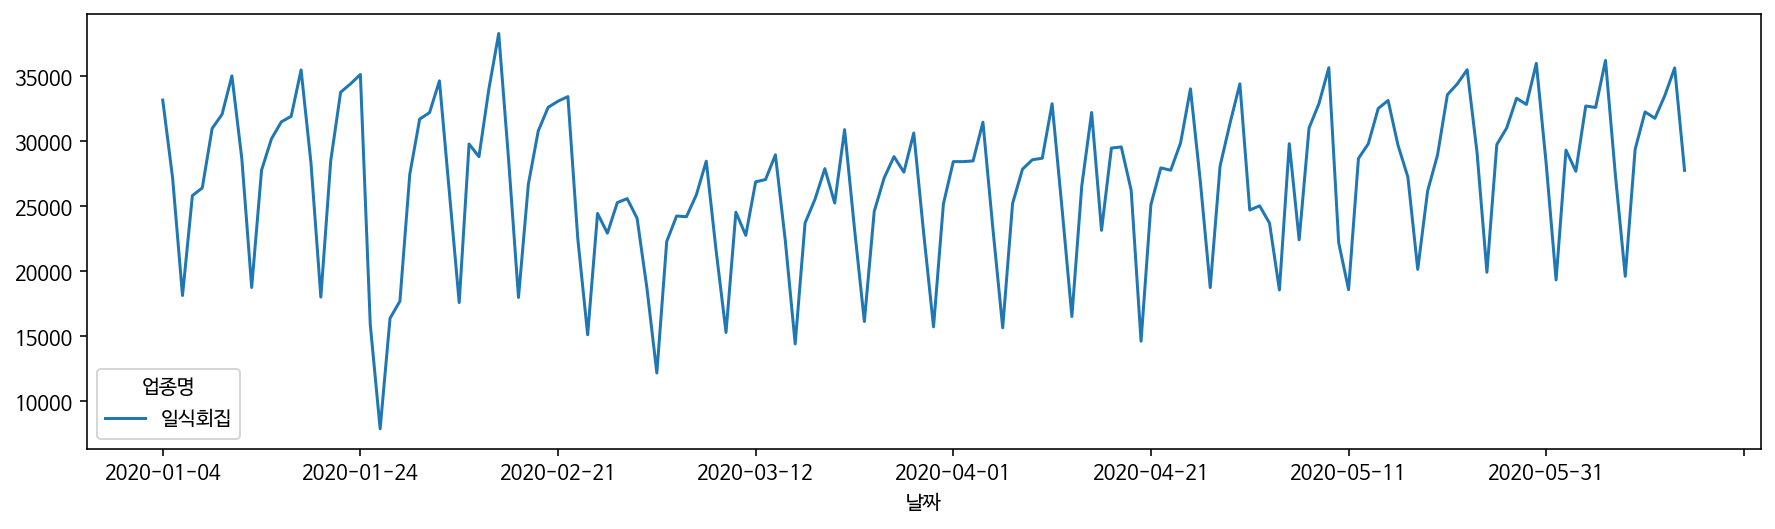

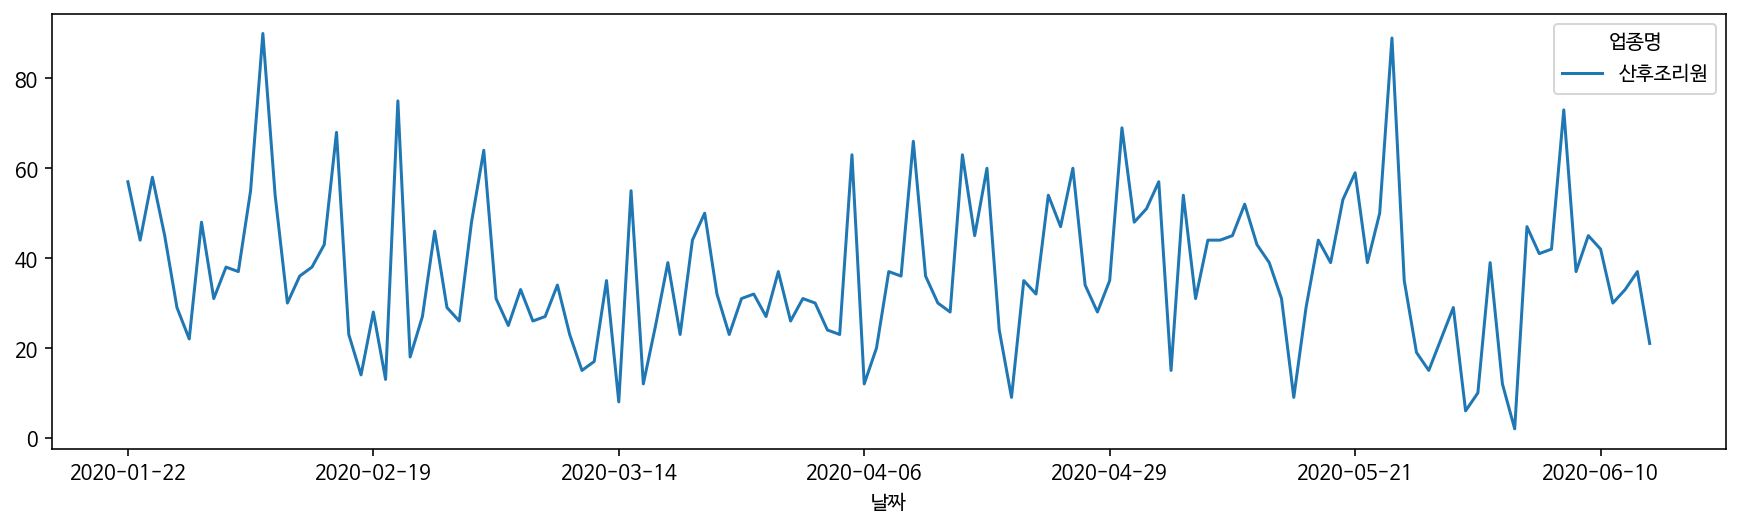

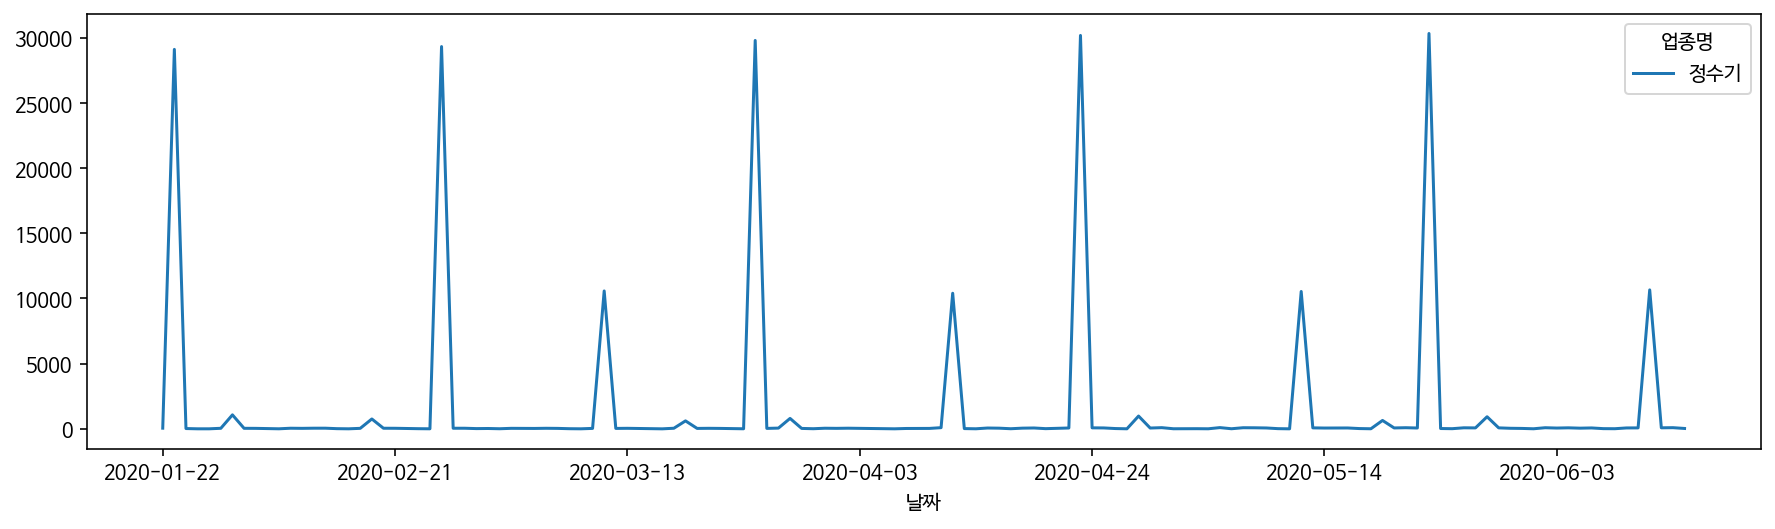

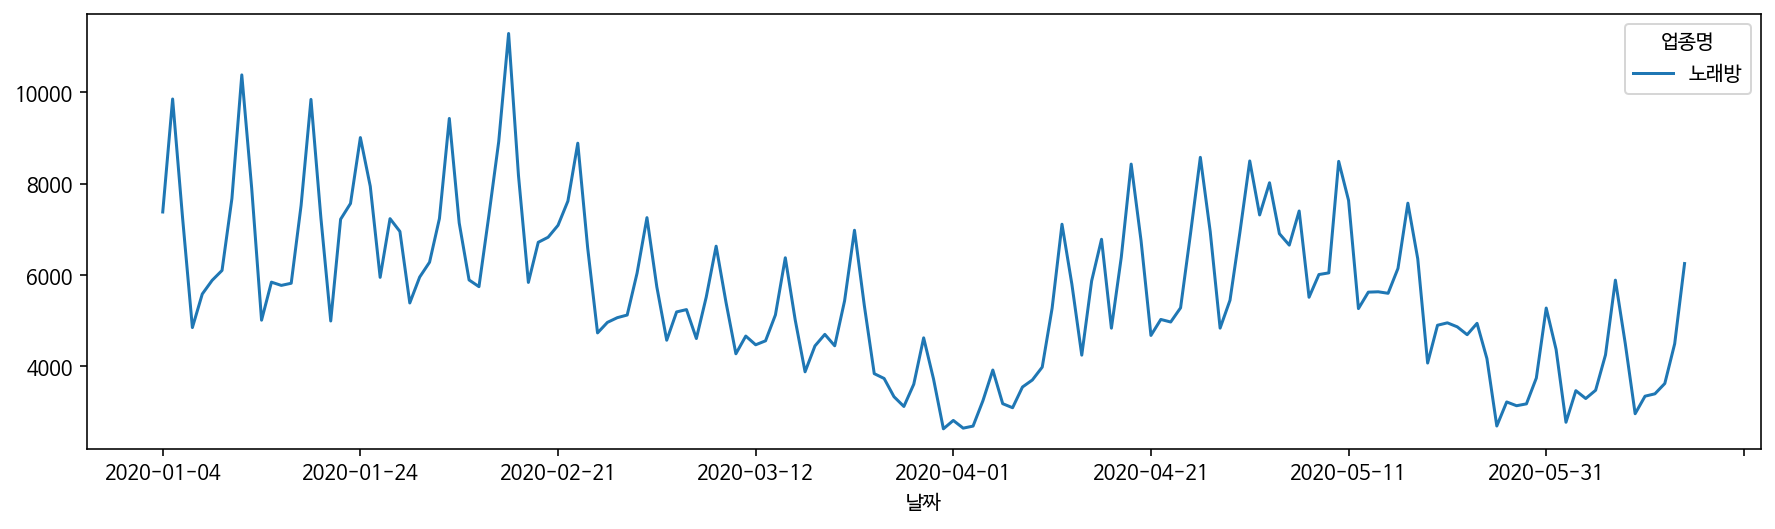

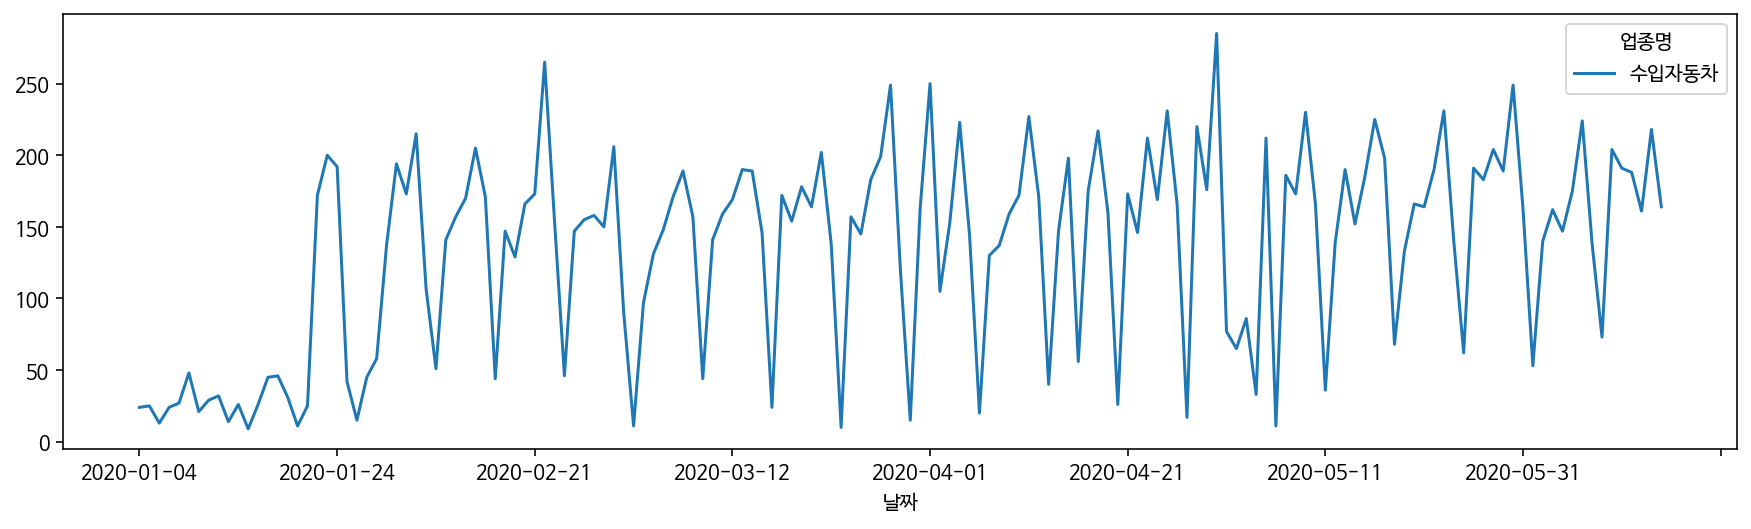

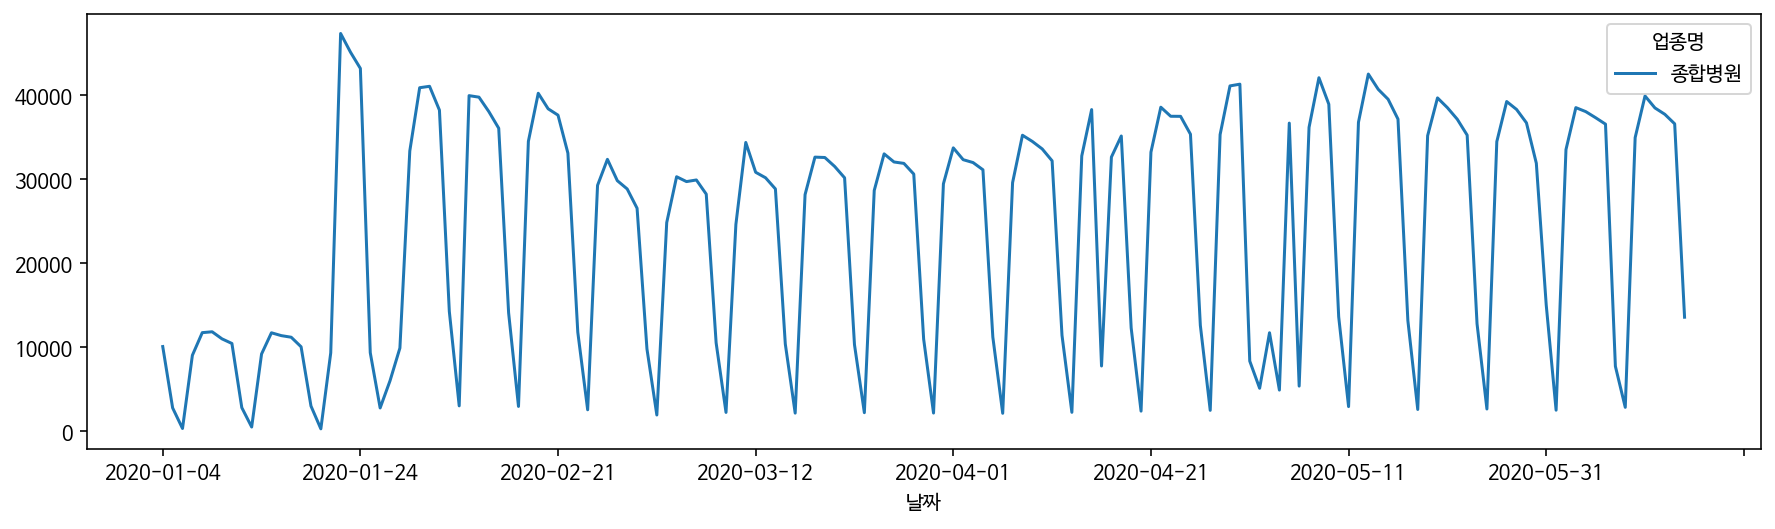

time: 3.44 s


In [ ]:
for i in range(len(down)):
  df[df['업종명'] == down[i]].pivot_table(index = '날짜', columns = '업종명', values = '판매건수', aggfunc = np.sum).plot(figsize = (15, 4))

## 이동평균을 시각화하여 회복추세를 확인

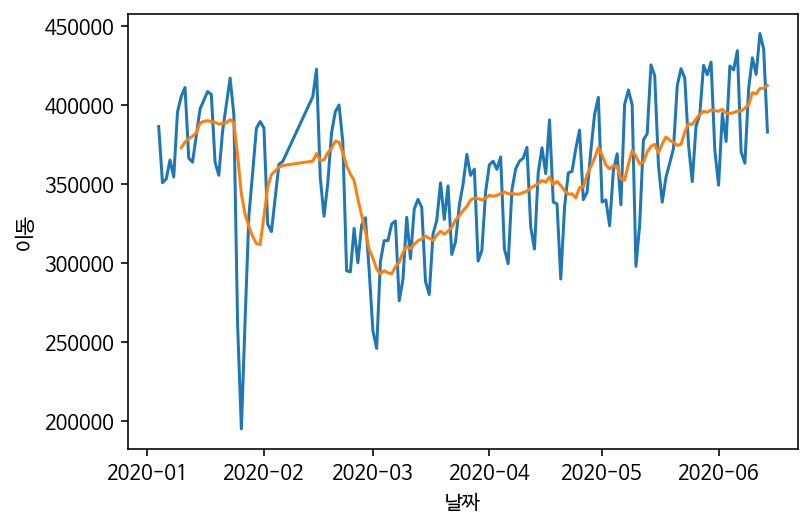

time: 341 ms


In [ ]:
west = df[df['업종명'] == '서양음식'].groupby('날짜')[['날짜', '판매건수']].sum().reset_index()
west['이동'] = west.rolling(7).mean()
sns.lineplot(data = west, x = '날짜', y = '판매건수', ci = None)
sns.lineplot(data = west, x = '날짜', y = '이동', ci = None)

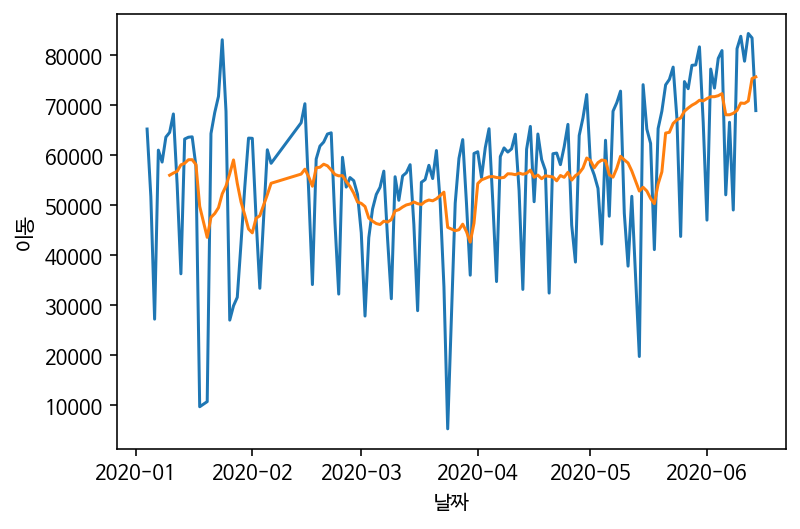

time: 337 ms


In [ ]:
golf = df[df['업종명'] == '기타음료식품'].groupby('날짜')[['날짜', '판매건수']].sum().reset_index()
golf['이동'] = golf.rolling(7).mean()
sns.lineplot(data = golf, x = '날짜', y = '판매건수', ci = None)
sns.lineplot(data = golf, x = '날짜', y = '이동', ci = None)

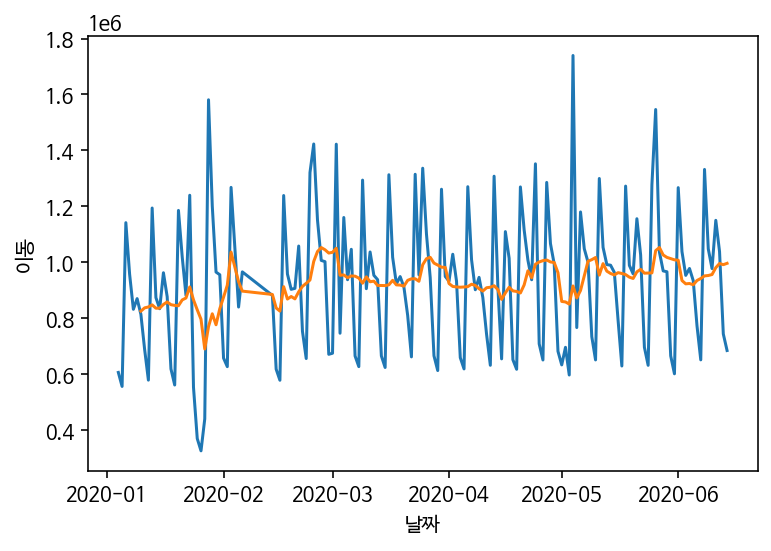

time: 408 ms


In [ ]:
pg = df[df['업종명'] == '인터넷P/G'].groupby('날짜')[['날짜', '판매건수']].sum().reset_index()
pg['이동'] = pg.rolling(7).mean()
sns.lineplot(data = pg, x = '날짜', y = '판매건수', ci = None)
sns.lineplot(data = pg, x = '날짜', y = '이동', ci = None)

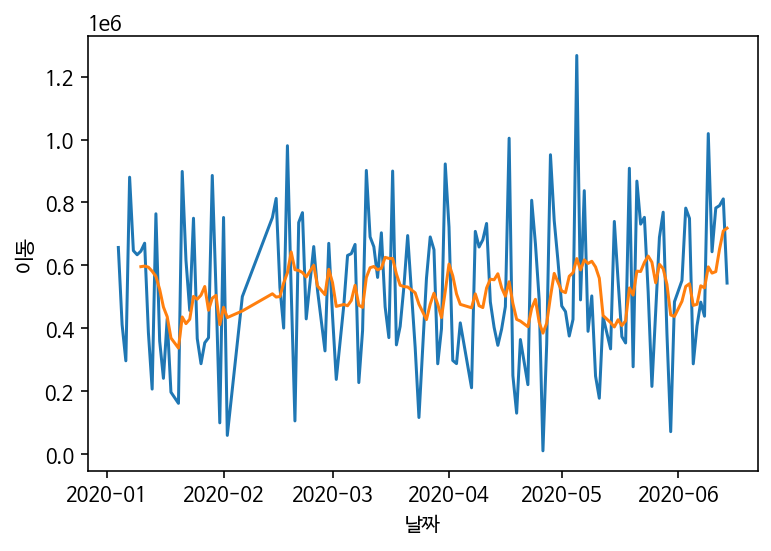

time: 344 ms


In [ ]:
conv = df[df['업종명'] == '편의점'].groupby('날짜')[['날짜', '판매건수']].sum().reset_index()
conv['이동'] = conv.rolling(7).mean()
sns.lineplot(data = conv, x = '날짜', y = '판매건수', ci = None)
sns.lineplot(data = conv, x = '날짜', y = '이동', ci = None)

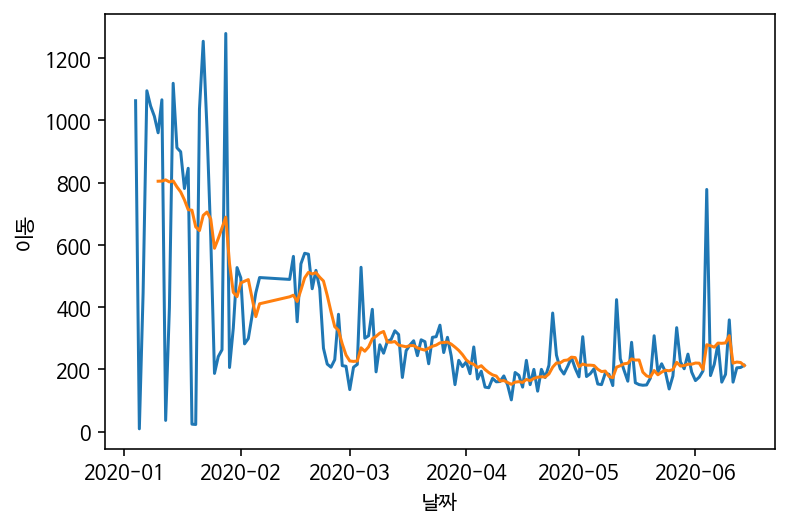

time: 307 ms


In [ ]:
travel = df[df['업종명'] == '관광여행'].groupby('날짜')[['날짜', '판매건수']].sum().reset_index()
travel['이동'] = travel.rolling(7).mean()
sns.lineplot(data = travel, x = '날짜', y = '판매건수', ci = None)
sns.lineplot(data = travel, x = '날짜', y = '이동', ci = None)

# 유동인구와 코로나 확진자수

In [ ]:
df_ppl = df.groupby(['날짜', '시군구'])[['유동인구', '확진자수']].first().reset_index()
df_ppl

날짜  시군구     유동인구  확진자수
0    2020-01-04  강남구  4268654     0
1    2020-01-04  강동구  2425402     0
2    2020-01-04  강북구  1036862     0
3    2020-01-04  강서구  2465692     0
4    2020-01-04  관악구  1977717     0
...         ...  ...      ...   ...
3870 2020-06-14  용산구  1848525     1
3871 2020-06-14  은평구  1436435     1
3872 2020-06-14  종로구  1269669     0
3873 2020-06-14   중구  1166980     0
3874 2020-06-14  중랑구  1436522     0

[3875 rows x 4 columns]

time: 68.4 ms


In [ ]:
df_ppl.groupby('시군구')['확진자수'].sum().reset_index()

시군구  확진자수
0    강남구    78
1    강동구    33
2    강북구    23
3    강서구    69
4    관악구    77
5    광진구    15
6    구로구    71
7    금천구    28
8    노원구    37
9    도봉구    37
10  동대문구    35
11   동작구    45
12   마포구    31
13  서대문구    32
14   서초구    49
15   성동구    47
16   성북구    31
17   송파구    51
18   양천구    65
19  영등포구    51
20   용산구    46
21   은평구    43
22   종로구    21
23    중구    10
24   중랑구    27

time: 27 ms


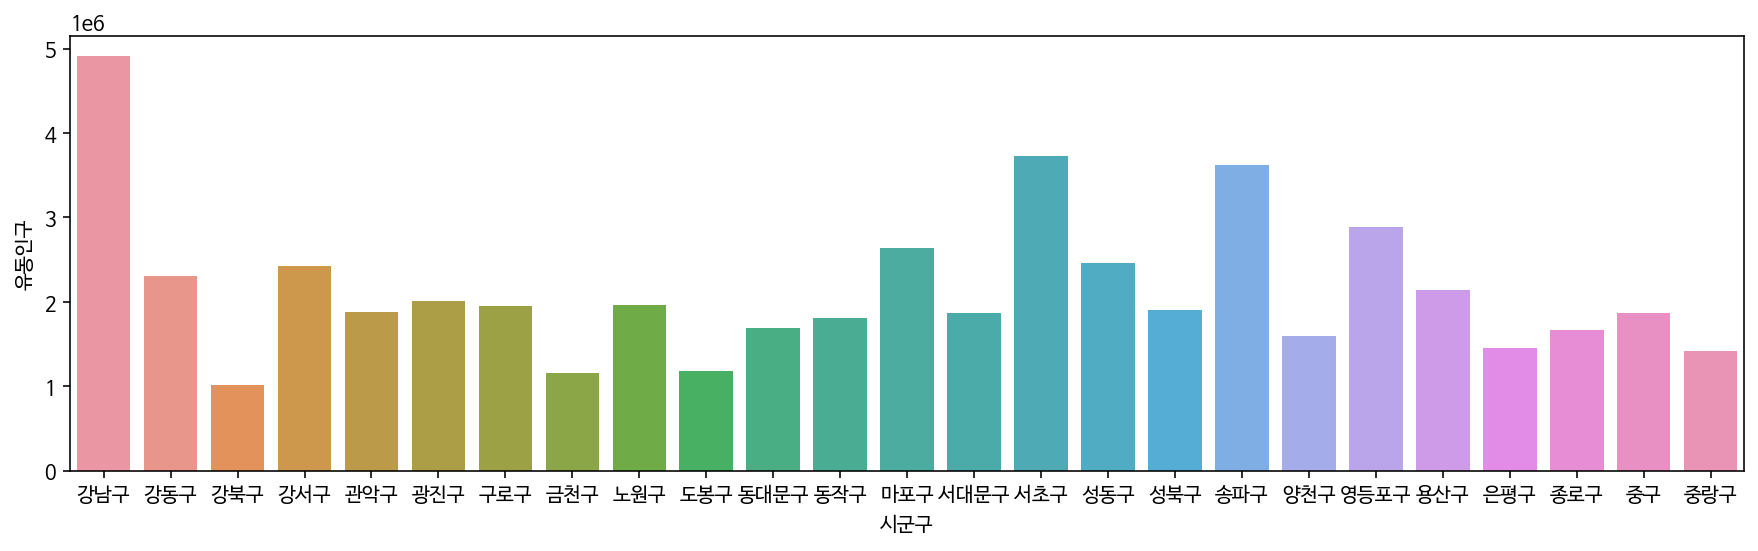

time: 451 ms


In [ ]:
plt.figure(figsize = (15, 4))
sns.barplot(data = df_ppl, x = '시군구', y = '유동인구', ci = None, estimator = np.median)

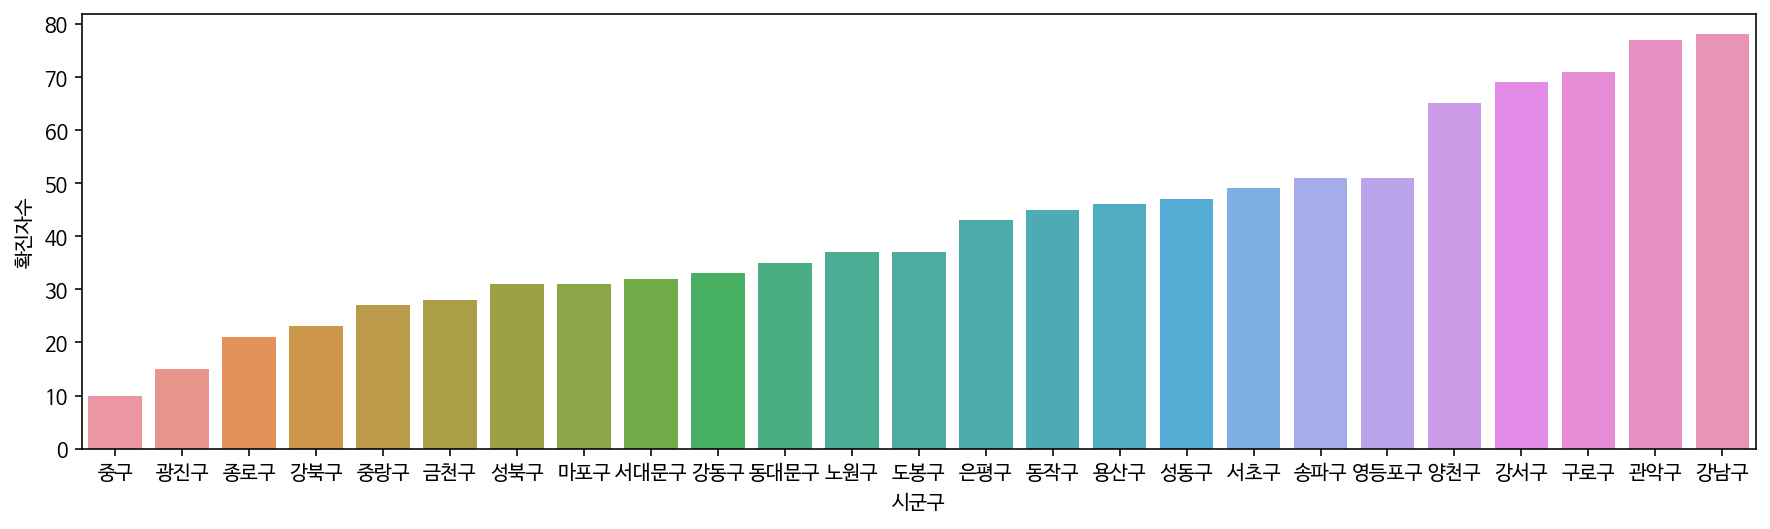

time: 441 ms


In [ ]:
plt.figure(figsize = (15, 4))
sns.barplot(data = df_ppl.groupby('시군구')['확진자수'].sum().sort_values().reset_index(), x = '시군구', y = '확진자수', ci = None)

In [ ]:
df_date = df.groupby(['날짜', '시군구'])['판매건수'].sum().reset_index()
df_date

날짜  시군구    판매건수
0    2020-01-04  강남구  342116
1    2020-01-04  강동구   76819
2    2020-01-04  강북구   24889
3    2020-01-04  강서구  149698
4    2020-01-04  관악구  104928
...         ...  ...     ...
3870 2020-06-14  용산구  184358
3871 2020-06-14  은평구   80431
3872 2020-06-14  종로구   80785
3873 2020-06-14   중구  295303
3874 2020-06-14  중랑구   60800

[3875 rows x 3 columns]

time: 76.4 ms
